<a href="https://colab.research.google.com/github/iamhimanshugulati/covid19-India-Data-Analysis/blob/main/Covid19_India_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 "India" Country Data Analysis (Data till 05/08/2021)

## Objectives:
1) To get data understanding.

2) Clean data as required.

3) Perform EDA (Explorartory Data Analysis), to get better understanding.

4) Modeling the data with help of feature selection technique.

5) Predict number of new cases, with previous data

### However, It is difficult to control the  covid-19, but we can reduce the transmissions by taking strict actions like wearing masks & creating confinement zones.

### Thus this predictions will help the organisations predict safe dates for adjusting confinement protocol and take other measures for a particular region.

## Index 

1) Data Cleaning 

2) EDA 

3) Modeling

## Source of Data
The source of data is www.ourworldindata.org

### Before staring our analysis, we need to import Python Libraries first.

In [1]:
# Importing required libraries

import numpy  as np   # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)

# Pandas uses the plot() method to create diagrams.
# Pythons uses Pyplot, a submodule of the Matplotlib library to visualize the diagram on the screen.
# Matplotlib is a low level graph plotting library in python that serves as a visualization utility
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# datetime modules is used for manuplating date and time.
import datetime as dt

# To ignore warning of version compatibilty issue(specially when working in local environemnt)
import warnings
warnings.filterwarnings("ignore")

# Import File from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Basic Information about numpy and pandas
#### numpy written in C language so it's relatively fast, it is used manage multidimensional arrays.
#### pandas just gives an access to play with data as we play with excel (It gives a functionality that's excel has but here we can acheive it with by "writing code").


In [2]:
# Reading CSV File and assinged variable i.e. "df_data"
df_data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/owid-covid-data.csv")

# Below functions helps us to see all columns whenever data got dsiplayed
pd.set_option('display.max_columns', None)

# Displaying data from head only top 10 rows
df_data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,0.026,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,0.051,0.026,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,0.103,0.051,0.011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### As we can see above from above data is:
    1) Index starts from 0.
    
    2) We can see columns name and what type of values they are giving, for more information regarding I referred to Dataset Dictionary of this Dataset.
    
    3) We can observe null values too.

### Now as we're assinged to work on India's data, so filtering data accordingly. 

In [3]:
# Fitering Location to India
grouplocation=df_data.groupby(df_data.location)

df_filtered=grouplocation.get_group("India")
# New variable assinged for filtering data i.e. "df_filtered"

In [4]:
# From shape we get number of rows and columns and also get to know in many dimenions we have data.
print("The Shape of the data frame is ",df_filtered.shape)

# Getting some which type of columns we have for "India" Dataset.
print("The Columns of the data frame are ",df_filtered.columns)

# Displaying data from head only top 10 rows
df_filtered.head(10)

The Shape of the data frame is  (465, 59)
The Columns of the data frame are  Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_v

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
35743,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35744,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35745,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35746,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35747,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35748,IND,Asia,India,2020-02-04,3.0,0.0,0.429,NaN,NaN,0.0,0.002,0.000,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35749,IND,Asia,India,2020-02-05,3.0,0.0,0.429,NaN,NaN,0.0,0.002,0.000,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35750,IND,Asia,India,2020-02-06,3.0,0.0,0.286,NaN,NaN,0.0,0.002,0.000,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35751,IND,Asia,India,2020-02-07,3.0,0.0,0.286,NaN,NaN,0.0,0.002,0.000,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35752,IND,Asia,India,2020-02-08,3.0,0.0,0.286,NaN,NaN,0.0,0.002,0.000,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Observation:
### 1. We get to know that for India we have 431 rows and 59 columns i.e. 2-D array

### Till here we get India's data now we try to clean data. 

## 1) Data Cleaning

In [5]:
# Getting to know about data-type, which type of data-types are in our dataset.
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 35743 to 36207
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               465 non-null    object 
 1   continent                              465 non-null    object 
 2   location                               465 non-null    object 
 3   date                                   465 non-null    object 
 4   total_cases                            465 non-null    float64
 5   new_cases                              465 non-null    float64
 6   new_cases_smoothed                     460 non-null    float64
 7   total_deaths                           424 non-null    float64
 8   new_deaths                             424 non-null    float64
 9   new_deaths_smoothed                    460 non-null    float64
 10  total_cases_per_million                465 non-null    float64
 11  

### Observation:
#### "date" data-type is object
#### "tests_units" data-type is object


In [6]:
# Need to know what type of value "tests_units" has.
df_filtered['tests_units'].unique()

array([nan, 'samples tested'], dtype=object)

#### We get to know that there is only 1 value i.e 'samples tested' and rest are null values, so we need to remove this column.

In [7]:
# Counting number of null values or missing value for each columns
df_filtered.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              41
new_deaths                                41
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  41
new_deaths_per_million                    41
new_deaths_smoothed_per_million            5
reproduction_rate                         48
icu_patients                             465
icu_patients_per_million                 465
hosp_patients                            465
hosp_patients_per_million                465
weekly_icu_admissions                    465
weekly_icu

In [8]:
# Shape and columns of filtered dataset
print("The shape of the data frame is", (df_filtered.shape))
print("The columns of the data frame are" , (df_filtered.columns))

The shape of the data frame is (465, 59)
The columns of the data frame are Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vac

#### As we have a data of 431 Rows, so as per null values we're going dop columns which has more than 70% approx of missing values.  

### Removing unnecessary columns & columns which have more than 70% missing value.

In [9]:
#Removing unnecessary columns
df_filtered.drop(columns=['hosp_patients', 'hosp_patients_per_million','weekly_icu_admissions', 'weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','new_tests','total_tests','total_tests_per_thousand','new_tests_per_thousand','tests_per_case','total_vaccinations','people_vaccinated','people_fully_vaccinated','new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','extreme_poverty','handwashing_facilities','tests_units','icu_patients','icu_patients_per_million'], axis =1 ,inplace =True)

### By the above function we removed unnecessary columns(as far as my knowledge)

In [10]:
# Now Getting updated of columns
df_filtered.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'stringency_index', 'population', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index'],
      dtype='object')

### Information >>>> Stringency Index - How ban implemented scaled to a value from 0 to 100 (100 = strictest).

### Now features which have less missing values we need to fill that, for filling that features we need to add that value which do not affect real data.

### Handling Missing Values by checking skewness

#### In below cell we're trying to run direct loop from column i.e. "total_cases" to columns i.e. "human_development_index", to get some data insights from each column.

In [11]:
# Checking Skewness from 'total_cases' to 'human_development_index'

df_filtered_univar=df_filtered.loc[:,'total_cases':'human_development_index']
df_filtered_univar=df_filtered_univar.select_dtypes([np.int, np.float])
for i, col in enumerate(df_filtered_univar.columns):
    print("\nSkewness of "+col +" is", df_filtered_univar[col].skew()) #measures skewness


Skewness of total_cases is 0.5088125446187579

Skewness of new_cases is 3.2026874500963305

Skewness of new_cases_smoothed is 3.270251503195401

Skewness of total_deaths is -0.05908676484705867

Skewness of new_deaths is 2.911271384211063

Skewness of new_deaths_smoothed is 2.8874045010642826

Skewness of total_cases_per_million is 0.5088125357558853

Skewness of new_cases_per_million is 3.2026864035415734

Skewness of new_cases_smoothed_per_million is 3.2702522058195864

Skewness of total_deaths_per_million is -0.05908698671452279

Skewness of new_deaths_per_million is 2.9110973496833257

Skewness of new_deaths_smoothed_per_million is 2.8874900134641344

Skewness of reproduction_rate is 1.434609297480794

Skewness of new_tests_smoothed is -0.09840269356773639

Skewness of new_tests_smoothed_per_thousand is -0.09851376791882516

Skewness of positive_rate is 1.6177838744189748

Skewness of stringency_index is -1.3771187976882504

Skewness of population is 0

Skewness of population_dens

### Information: 
                   ## if Skewness is in postive means it is rightly Skewed
                   ## elif Skewness is Negative means it is leftly Skewed
                   ## else Skewness is zero or nearby means data is uniformly distibuted

### Observation: Now as per skewness whether its positive or negative, we will try fill null values with help of that.
### Example - "positive_rate" has 53 null values and skewness is "0.47990178167830605" approx to "0.5" it is Positive skewed but 0.5 it is almost to unifrom distribution of data, so we will fill null values of "positive_rate" with mean.

In [12]:
#Counting number of null values
df_filtered.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                         0
new_cases                           0
new_cases_smoothed                  5
total_deaths                       41
new_deaths                         41
new_deaths_smoothed                 5
total_cases_per_million             0
new_cases_per_million               0
new_cases_smoothed_per_million      5
total_deaths_per_million           41
new_deaths_per_million             41
new_deaths_smoothed_per_million     5
reproduction_rate                  48
new_tests_smoothed                 51
new_tests_smoothed_per_thousand    51
positive_rate                      52
stringency_index                    8
population                          0
population_density                  0
median_age                          0
aged_65_older                       0
aged_70_older                       0
gdp_per_capi

### Replacing Null Values with median(Positive Skewed), mean(Uniform Distribution) and mean(Negative Skewed) as per graph and skewness data.

In [13]:
df_filtered['total_deaths']=df_filtered['total_deaths'].fillna(df_filtered['total_deaths'].mean())
df_filtered['new_deaths']=df_filtered['new_deaths'].fillna(df_filtered['new_deaths'].median())
df_filtered['new_cases_smoothed_per_million']=df_filtered['new_cases_smoothed_per_million'].fillna(df_filtered['new_cases_smoothed_per_million'].median())
df_filtered['total_deaths_per_million']=df_filtered['total_deaths_per_million'].fillna(df_filtered['total_deaths_per_million'].median())
df_filtered['new_deaths_per_million']=df_filtered['new_deaths_per_million'].fillna(df_filtered['new_deaths_per_million'].median())
df_filtered['new_deaths_smoothed_per_million']=df_filtered['new_deaths_smoothed_per_million'].fillna(df_filtered['new_deaths_smoothed_per_million'].median())
df_filtered['reproduction_rate']=df_filtered['reproduction_rate'].fillna(df_filtered['reproduction_rate'].median())
df_filtered['new_tests_smoothed']=df_filtered['new_tests_smoothed'].fillna(df_filtered['new_tests_smoothed'].mean())
df_filtered['new_tests_smoothed_per_thousand']=df_filtered['new_tests_smoothed_per_thousand'].fillna(df_filtered['new_tests_smoothed_per_thousand'].mean())
df_filtered['stringency_index']=df_filtered['stringency_index'].fillna(df_filtered['stringency_index'].mean())
df_filtered['positive_rate']=df_filtered['positive_rate'].fillna(df_filtered['positive_rate'].mean())
df_filtered['new_cases_smoothed']=df_filtered['new_cases_smoothed'].fillna(df_filtered['new_cases_smoothed'].mean())
df_filtered['new_deaths_smoothed']=df_filtered['new_deaths_smoothed'].fillna(df_filtered['new_deaths_smoothed'].mean())

### Why we replaced values like these??
### We replace value with that value that near or near to avergae of full data, so that's will not create more variation in data.  

In [14]:
#counting number of null values
df_filtered.isnull().sum().sum()

0

### Data Cleaning Part is done, now data is cleaned.

## 2) EDA

### Univariate involves the analysis of a single variable

### Understanding Data by performing Univariate Analysis

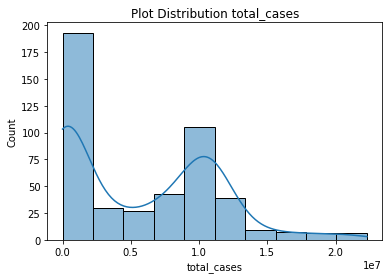

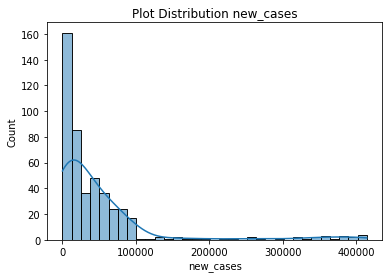

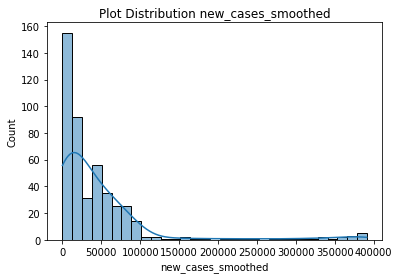

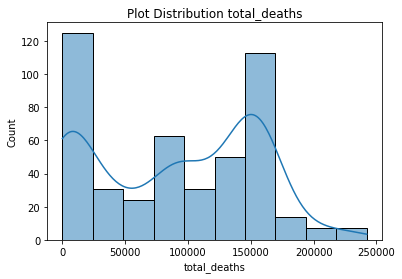

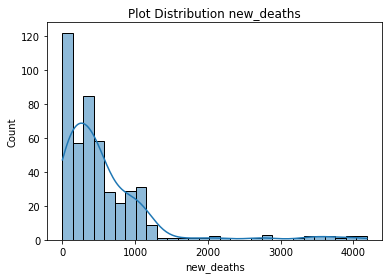

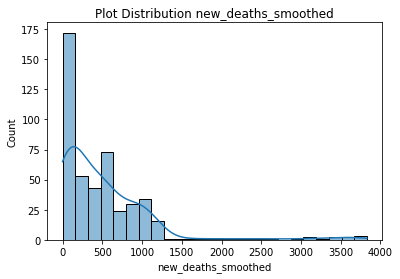

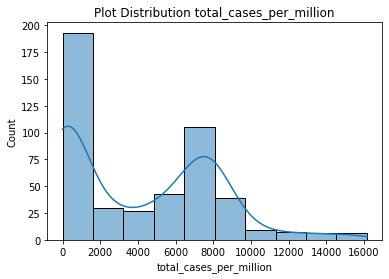

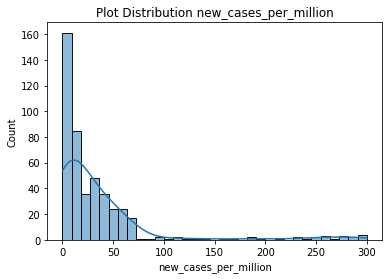

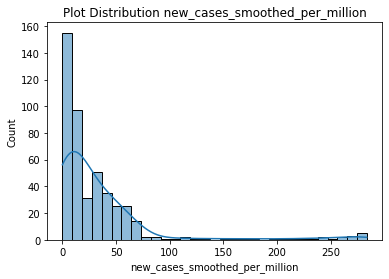

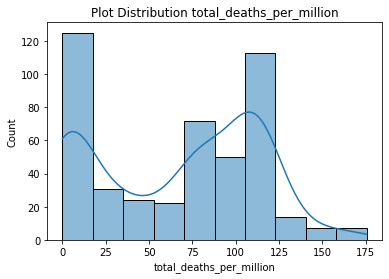

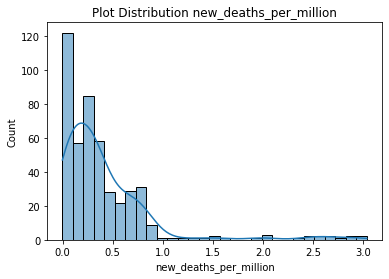

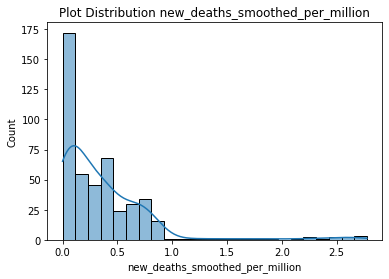

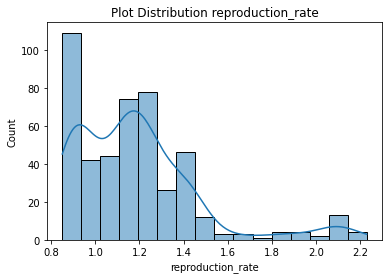

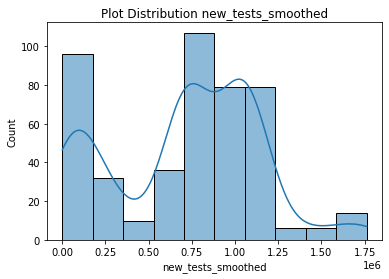

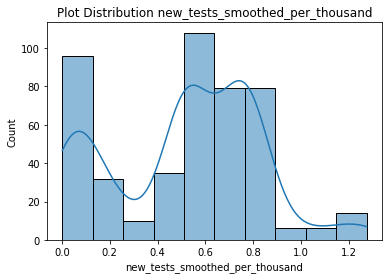

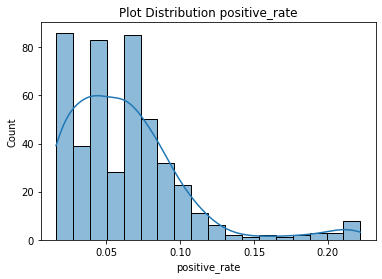

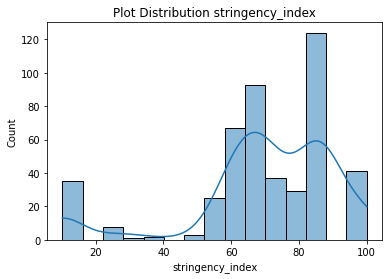

In [15]:
df_filtered_univar_1=df_filtered.loc[:,'total_cases':'stringency_index']
df_filtered_univar_1=df_filtered_univar_1.select_dtypes([np.int, np.float])

for i, col in enumerate(df_filtered_univar_1.columns):
    plt.figure(i)
    sns.histplot(x=col, data=df_filtered_univar_1,kde=True).set_title("Plot Distribution "+col)

## Observation

total_cases as per curve nearly unifrom distributed

new_cases as per curve +ve skewed 

new_cases_smoothed as per curve +ve skewed 

total_deaths as per curve nearly unifrom distributed

new_deaths is as per curve +ve skewed 

new_deaths_smoothed as per curve +ve skewed 

total_cases_per_million s per curve nearly unifrom distributed

new_cases_per_million as per curve +ve skewed 

new_cases_smoothed_per_million as per curve +ve skewed 

total_deaths_per_million as per curve nearly unifrom distributed

new_deaths_per_million as per curve +ve skewed 

new_deaths_smoothed_per_million as per curve +ve skewed 

reproduction_rate as per curve +ve skewed

new_tests_smoothed as per curve nearly unifrom distributed

new_tests_smoothed_per_thousand as per curve nearly unifrom distributed

positive_rate as per curve nearly unifrom distributed

stringency_index as per curve -ve skewed 

### From Above distribution we can say that data is not equally distributed.

### Now as we checked in datatype section feature 'date' is object, so chaging on basis date so that we can data data accroding tro date aslo adding  month feature to perform EDA part.

In [16]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
# Above code conver column 'date' from object to datetime data-type, so we can use 'date' columns for an analysis

df_filtered['month'] = df_filtered['date'].dt.month_name()
# Above code add new column i.e. 'month', it will get data on basis of date. 
# example for date - 28/10/2020 month is 'October' data added accordingly. 

df_filtered['year'] = df_filtered['date'].dt.year
# As the month column, year also added

df_filtered['month'] = df_filtered['month'] + df_filtered['year'].astype(str)
# now added both columns in 'month' column

df_filtered.head(10)
# checking progess in our file

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,month,year
35743,IND,Asia,India,2020-01-30,1.0,1.0,45848.163363,90580.445755,391.0,500.752502,0.001,0.001,15.7935,77.5015,0.283,0.239,1.15,708624.683575,0.513512,0.062436,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,January2020,2020
35744,IND,Asia,India,2020-01-31,1.0,0.0,45848.163363,90580.445755,391.0,500.752502,0.001,0.000,15.7935,77.5015,0.283,0.239,1.15,708624.683575,0.513512,0.062436,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,January2020,2020
35745,IND,Asia,India,2020-02-01,1.0,0.0,45848.163363,90580.445755,391.0,500.752502,0.001,0.000,15.7935,77.5015,0.283,0.239,1.15,708624.683575,0.513512,0.062436,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,February2020,2020
35746,IND,Asia,India,2020-02-02,2.0,1.0,45848.163363,90580.445755,391.0,500.752502,0.001,0.001,15.7935,77.5015,0.283,0.239,1.15,708624.683575,0.513512,0.062436,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,February2020,2020
35747,IND,Asia,India,2020-02-03,3.0,1.0,45848.163363,90580.445755,391.0,500.752502,0.002,0.001,15.7935,77.5015,0.283,0.239,1.15,708624.683575,0.513512,0.062436,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,February2020,2020
35748,IND,Asia,India,2020-02-04,3.0,0.0,0.429000,90580.445755,391.0,0.000000,0.002,0.000,0.0000,77.5015,0.283,0.000,1.15,708624.683575,0.513512,0.062436,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,February2020,2020
35749,IND,Asia,India,2020-02-05,3.0,0.0,0.429000,90580.445755,391.0,0.000000,0.002,0.000,0.0000,77.5015,0.283,0.000,1.15,708624.683575,0.513512,0.062436,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,February2020,2020
35750,IND,Asia,India,2020-02-06,3.0,0.0,0.286000,90580.445755,391.0,0.000000,0.002,0.000,0.0000,77.5015,0.283,0.000,1.15,708624.683575,0.513512,0.062436,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,February2020,2020
35751,IND,Asia,India,2020-02-07,3.0,0.0,0.286000,90580.445755,391.0,0.000000,0.002,0.000,0.0000,77.5015,0.283,0.000,1.15,708624.683575,0.513512,0.062436,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,February2020,2020
35752,IND,Asia,India,2020-02-08,3.0,0.0,0.286000,90580.445755,391.0,0.000000,0.002,0.000,0.0000,77.5015,0.283,0.000,1.15,708624.683575,0.513512,0.062436,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,February2020,2020


### Getting Statistical data with pandas predefined function.

In [17]:
df_filtered.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,year
count,4.650000e+02,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,4.650000e+02,465.000000,465.000000,465.000000,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,4.650000e+02,465.000000
mean,5.783716e+06,47948.561290,45848.163363,90580.445755,555.651613,500.752502,4191.084920,34.745217,33.035801,66.683825,0.402613,0.361518,1.183226,7.086247e+05,0.513512,0.062436,70.154420,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.300000e-01,6.966000e+01,6.450000e-01,2020.275269
std,5.462976e+06,77122.031264,71172.437760,65022.369159,673.407777,619.932220,3958.665816,55.885345,51.605454,47.237704,0.487974,0.449418,0.284350,4.313063e+05,0.312546,0.039681,22.045127,0.000000e+00,3.528088e-12,1.920532e-13,2.400664e-14,1.111419e-14,7.465889e-11,9.673789e-13,1.422616e-14,1.489301e-14,1.778270e-13,1.000277e-15,1.280354e-13,1.111419e-15,0.447131
min,1.000000e+00,0.000000,0.000000,1.000000,-1.000000,0.000000,0.001000,0.000000,0.000000,0.001000,-0.001000,0.000000,0.850000,1.121000e+03,0.001000,0.016000,10.190000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.300000e-01,6.966000e+01,6.450000e-01,2020.000000
25%,1.449500e+05,6414.000000,7200.571000,19693.000000,137.000000,102.571000,105.036000,4.648000,5.218000,14.270000,0.099000,0.074000,0.940000,2.687730e+05,0.195000,0.036000,61.570000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.300000e-01,6.966000e+01,6.450000e-01,2020.000000
50%,5.308014e+06,22771.000000,22375.286000,90580.445755,391.000000,343.143000,3846.375000,16.501000,15.793500,77.501500,0.283000,0.239000,1.150000,7.283910e+05,0.528000,0.060000,69.910000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.300000e-01,6.966000e+01,6.450000e-01,2020.000000
75%,1.049515e+07,55839.000000,56223.286000,151529.000000,714.000000,727.714000,7605.155000,40.463000,40.741000,109.803000,0.517000,0.527000,1.290000,1.047412e+06,0.759000,0.081000,85.650000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.300000e-01,6.966000e+01,6.450000e-01,2021.000000
max,2.229608e+07,414188.000000,391232.000000,242347.000000,4187.000000,3829.286000,16156.529000,300.135000,283.501000,175.613000,3.034000,2.775000,2.230000,1.761557e+06,1.276000,0.222000,100.000000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.300000e-01,6.966000e+01,6.450000e-01,2021.000000


### Observation: 1) We can see a negative value in new_deaths (will check in next cell).
### 2)From this above, we get to know there are many columns with same type of data
### example - population_density, population, median_age, aged_65_older etc however we get know about these columns when we're checking skewness of columns

In [18]:
# getting to know last min 5 value in new_deaths column
sorted(list(df_filtered.new_deaths))[:5]

[-1.0, 0.0, 0.0, 0.0, 0.0]

### Observation: It was just taking nearby value, so ignoring that "-1" in new_deaths. 

### Multivariate or Bivariate analysis examines two or more variables.

### Performing Bivariate Analysis getting relationship with respect to time.

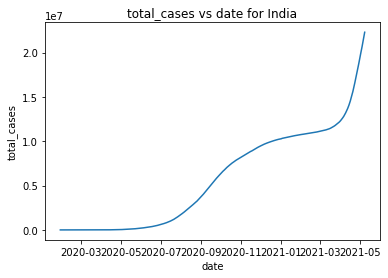

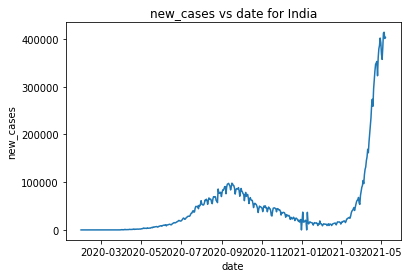

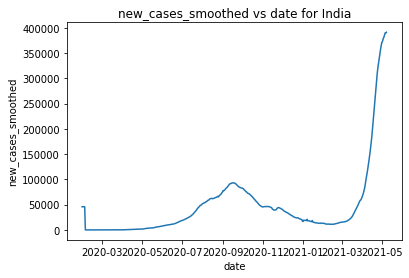

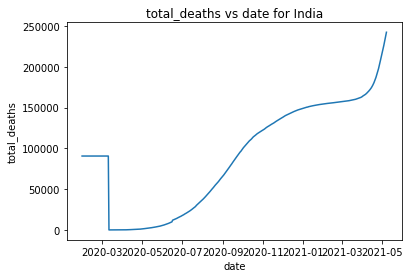

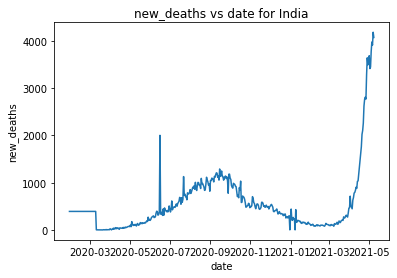

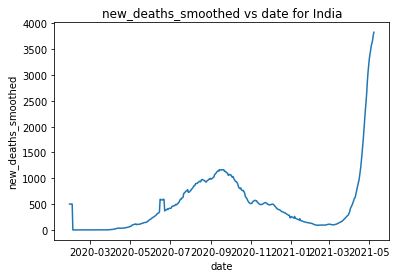

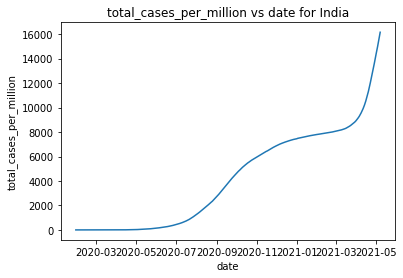

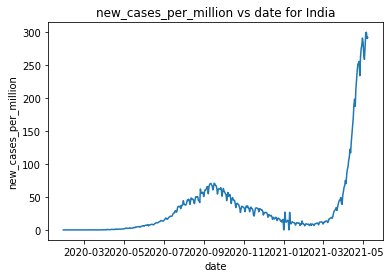

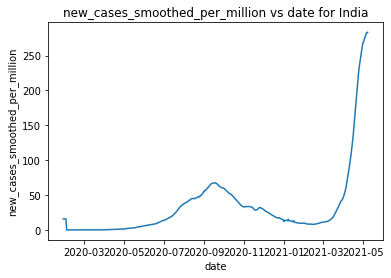

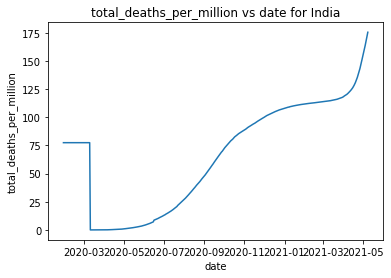

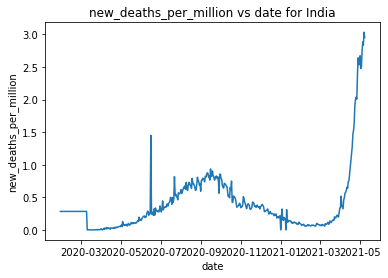

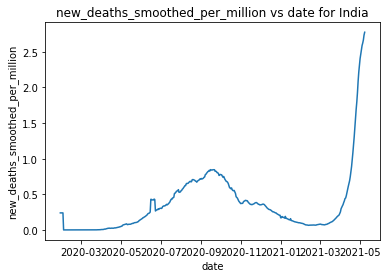

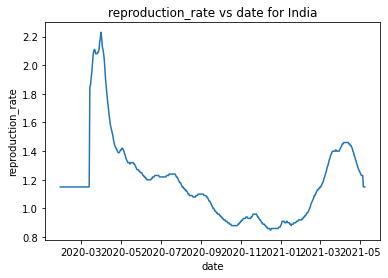

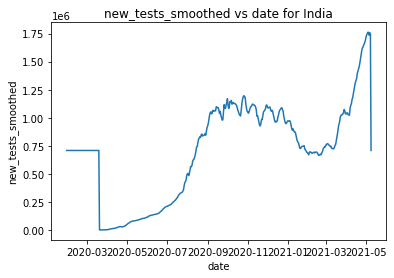

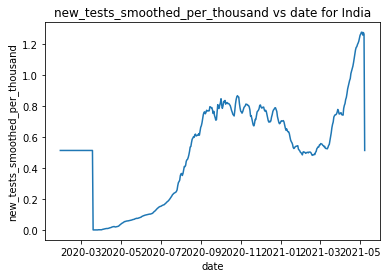

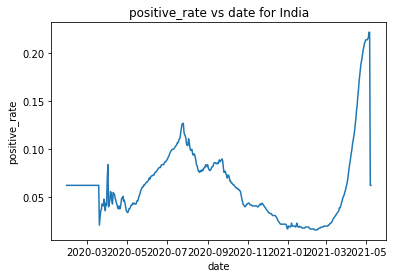

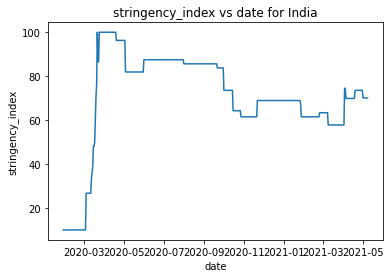

In [19]:
df_filtered_bivar=df_filtered.loc[:,'date':'stringency_index']
for i, feature in enumerate(df_filtered_bivar.columns[1:]):
    plt.figure(i)
    g = sns.lineplot(x=df_filtered_bivar.date,y=feature,data=df_filtered_bivar).set_title(feature +" vs date for India")


### We can observe that total_cases & total_deaths has an exponential graph.

### Now Performing Bivariate Analysis getting relationship with respect to new_cases(our target variable)

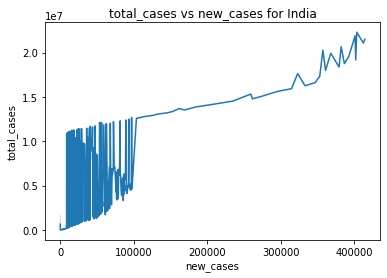

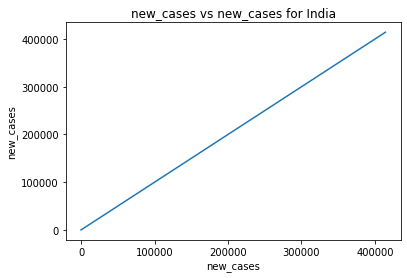

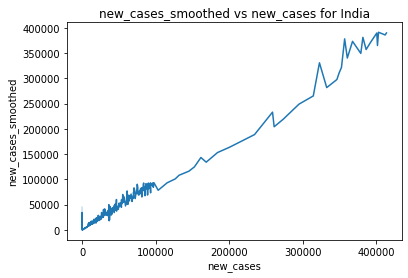

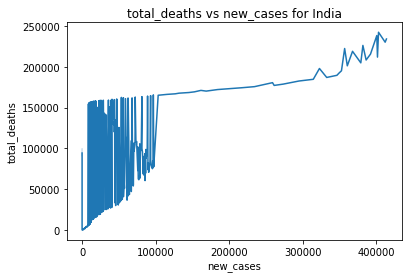

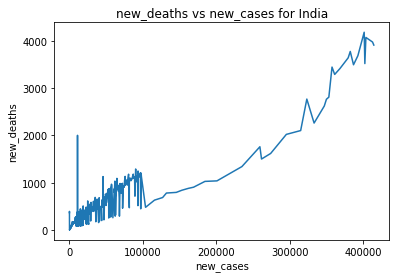

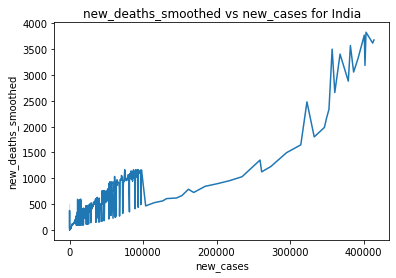

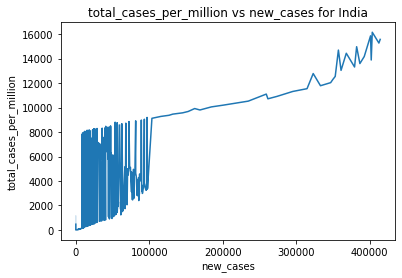

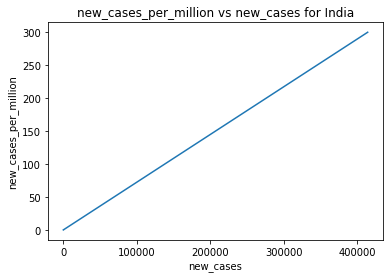

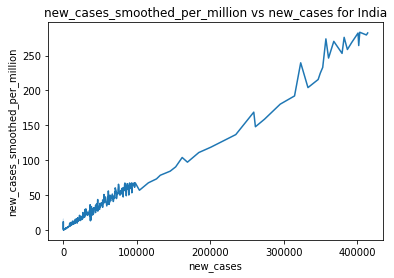

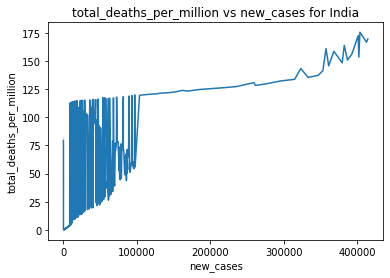

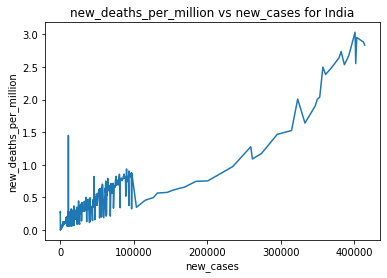

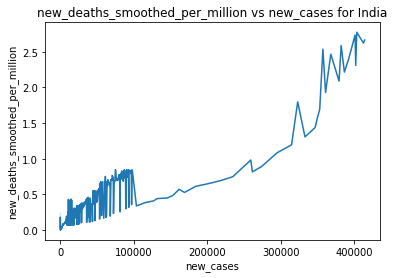

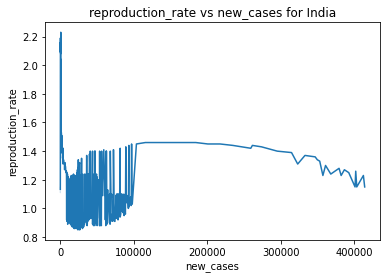

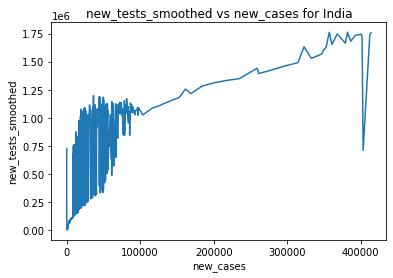

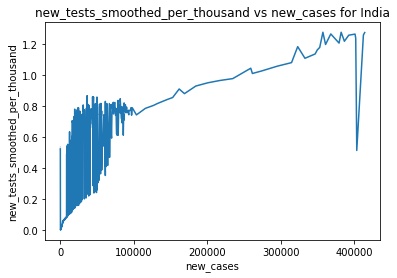

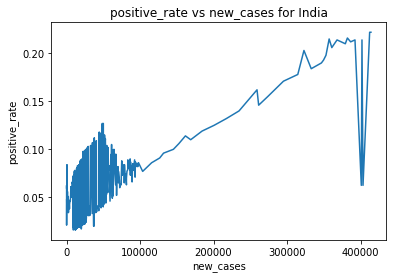

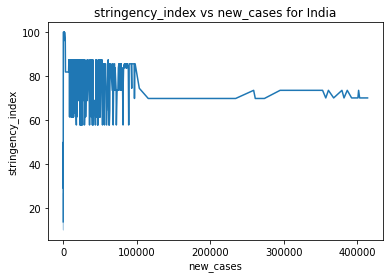

In [20]:
df_filtered_bivar=df_filtered.loc[:,'date':'stringency_index']
for i, feature in enumerate(df_filtered_bivar.columns[1:]):
    plt.figure(i)
    g = sns.lineplot(x=df_filtered_bivar.new_cases,y=feature,data=df_filtered_bivar).set_title(feature +" vs new_cases for India")

### Observation: As we can see all columns are related to "new_cases" column

## Some Results regarding No. of Recovered, Active & bed at Hospital 

### Number of Cases Recovered

In [21]:
df_filtered['recovered_cases'] = df_filtered['total_cases']-df_filtered['total_deaths'] - df_filtered['new_cases']

### Number of availabale Bed at Hospital

In [22]:
df_filtered['total_beds_available'] = (df_filtered['population']/1000)*df_filtered['hospital_beds_per_thousand']

### Number of Active Cases

In [23]:
df_filtered['active_case'] = df_filtered['total_cases'] - df_filtered['recovered_cases'] - df_filtered['new_deaths']

In [24]:
# Viewing output of above code
df_filtered.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,month,year,recovered_cases,total_beds_available,active_case
36198,IND,Asia,India,2021-04-29,18762976.0,386555.0,357040.143,208330.0,3498.0,3058.571,13596.316,280.111,258.724,150.963,2.535,2.216,1.27,1.680982e+06,1.218000,0.212000,73.61000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,April2021,2021,18168091.0,731402.32405,591387.0
36199,IND,Asia,India,2021-04-30,19164969.0,401993.0,364926.857,211853.0,3523.0,3187.000,13887.615,291.298,264.439,153.516,2.553,2.309,1.26,1.706633e+06,1.237000,0.214000,73.61000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,April2021,2021,18551123.0,731402.32405,610323.0
36200,IND,Asia,India,2021-05-01,19557457.0,392488.0,371040.714,215542.0,3689.0,3318.714,14172.025,284.411,268.869,156.189,2.673,2.405,1.25,1.734023e+06,1.257000,0.214000,70.15442,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,May2021,2021,18949427.0,731402.32405,604341.0
36201,IND,Asia,India,2021-05-02,19925517.0,368060.0,373193.429,218959.0,3417.0,3405.143,14438.735,266.709,270.429,158.665,2.476,2.467,1.24,1.746218e+06,1.265000,0.214000,70.15442,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,May2021,2021,19338498.0,731402.32405,583602.0
36202,IND,Asia,India,2021-05-03,20282833.0,357316.0,378092.429,222408.0,3449.0,3502.000,14697.658,258.924,273.979,161.165,2.499,2.538,1.23,1.760837e+06,1.276000,0.215000,70.15442,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,May2021,2021,19703109.0,731402.32405,576275.0
36203,IND,Asia,India,2021-05-04,20664979.0,382146.0,381123.714,226188.0,3780.0,3571.571,14974.575,276.917,276.176,163.904,2.739,2.588,1.23,1.761557e+06,1.276000,0.216000,70.15442,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,May2021,2021,20056645.0,731402.32405,604554.0
36204,IND,Asia,India,2021-05-05,21077410.0,412431.0,385855.571,230168.0,3980.0,3619.429,15273.437,298.862,279.605,166.788,2.884,2.623,1.23,1.735470e+06,1.258000,0.222000,70.15442,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,May2021,2021,20434811.0,731402.32405,638619.0
36205,IND,Asia,India,2021-05-06,21491598.0,414188.0,389803.143,234083.0,3915.0,3679.000,15573.572,300.135,282.465,169.625,2.837,2.666,1.15,1.757604e+06,1.274000,0.222000,70.15442,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,May2021,2021,20843327.0,731402.32405,644356.0
36206,IND,Asia,India,2021-05-07,21892676.0,401078.0,389672.429,238270.0,4187.0,3773.857,15864.208,290.635,282.370,172.659,3.034,2.735,1.15,1.744230e+06,1.264000,0.062436,70.15442,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,May2021,2021,21253328.0,731402.32405,635161.0
36207,IND,Asia,India,2021-05-08,22296081.0,403405.0,391232.000,242347.0,4077.0,3829.286,16156.529,292.322,283.501,175.613,2.954,2.775,1.15,7.086247e+05,0.513512,0.062436,70.15442,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,282.28,10.39,1.9,20.6,0.53,69.66,0.645,May2021,2021,21650329.0,731402.32405,641675.0


## Checking Correlation with Specific features Only

,total_cases,new_cases,total_deaths,new_deaths,new_tests_smoothed,positive_rate,stringency_index,reproduction_rate
total_cases,1.000000,0.621605,0.930847,0.460075,0.783322,0.080632,-0.088039,-0.345466
new_cases,0.621605,1.000000,0.489531,0.936403,0.642387,0.767905,0.105593,-0.012588
total_deaths,0.930847,0.489531,1.000000,0.373481,0.840485,-0.014937,-0.397386,-0.475839
new_deaths,0.460075,0.936403,0.373481,1.000000,0.594883,0.795828,0.073928,-0.124478
new_tests_smoothed,0.783322,0.642387,0.840485,0.594883,1.000000,0.263545,-0.344628,-0.507948
positive_rate,0.080632,0.767905,-0.014937,0.795828,0.263545,1.000000,0.155148,0.173931
stringency_index,-0.088039,0.105593,-0.397386,0.073928,-0.344628,0.155148,1.000000,0.271159
reproduction_rate,-0.345466,-0.012588,-0.475839,-0.124478,-0.507948,0.173931,0.271159,1.000000


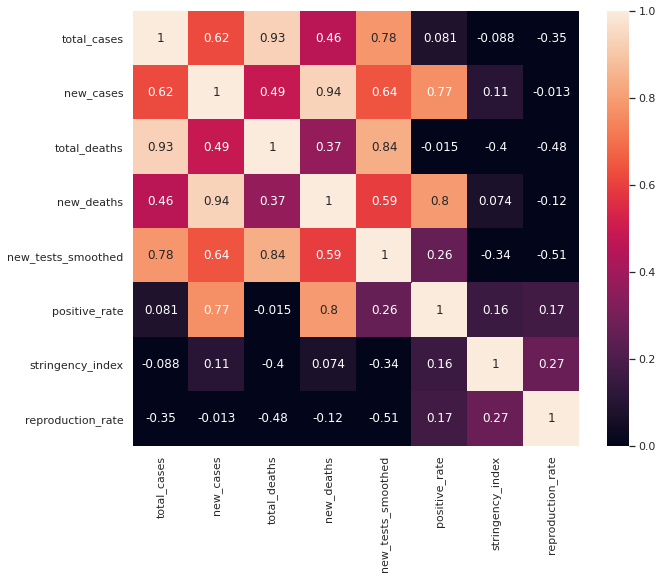

In [25]:
#### Plotting Heat map to check Correlation
df_filtered_corr=df_filtered[['total_cases', 'new_cases','total_deaths', 'new_deaths', 'new_tests_smoothed', 'positive_rate', 'stringency_index', 'reproduction_rate']].corr()
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df_filtered_corr, vmin=0, vmax=1,annot=True)
df_filtered_corr

### Information: HeatMAp shows correlation between 2 columns/feature, value start from 0 to 1, where 0 indicates for no realation and 1 indicates for highly correlated columns 

## From above data we can say that Independent variabels are new_deaths 'stringency_index', 'positive_rate','reproduction_rate.

#### Now Checking Starting Date, Ending Date & Number of days data available.

In [26]:
print("Starting date:",df_filtered['date'].min())
print("End date:",df_filtered['date'].max())
print("Length of data with respect to days:",(df_filtered['date'].max() - df_filtered['date'].min()))

Starting date: 2020-01-30 00:00:00
End date: 2021-05-08 00:00:00
Length of data with respect to days: 464 days 00:00:00


### Starting date of data: 2020-01-30 00:00:00
### End date date of data: 2021-05-08 00:00:00
### Length of data with respect to days: 409 days 00:00:00

### For better understanding grouping data on Month Basis and Visualizing that data in bar & line graph.

In [27]:
# Filtering data according to month and Year, so we can do analysis basis on mointhly basis. 
df_grouped=df_filtered.groupby(df_filtered.month).sum()
new_order=['January2020','February2020', 'March2020', 'April2020','May2020','June2020','July2020','August2020','September2020','October2020','November2020','December2020','January2021','February2021','March2021','April2021','May2021']

In [28]:
# Assigning month variable as index 
df_grouped = df_grouped.reindex(new_order, axis=0)
df_grouped = df_grouped.loc[:,:'stringency_index']
df_grouped

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,stringency_index
month,,,,,,,,,,,,,,,,,
January2020,2.0,1.0,9.169633e+04,1.811609e+05,782.0,1001.505004,0.002,0.001,31.5870,155.0030,0.566,0.478,2.30,1.417249e+06,1.027024,0.124872,20.380000
February2020,84.0,2.0,1.375463e+05,2.626833e+06,11339.0,1502.257507,0.056,0.002,47.3805,2247.5435,8.207,0.717,33.35,2.055012e+07,14.891850,1.810639,295.510000
March2020,10252.0,1394.0,9.870020e+02,9.060305e+05,3945.0,24.289000,7.430,1.010,0.7170,775.1760,2.856,0.017,50.94,1.348552e+07,9.772729,1.648281,1690.270000
April2020,447607.0,33466.0,2.863900e+04,1.441700e+04,1119.0,928.001000,324.351,24.249,20.7530,10.4450,0.810,0.670,50.42,6.438300e+05,0.466000,1.428000,2959.300000
May2020,3088494.0,155746.0,1.368199e+05,9.415400e+04,4254.0,3809.714000,2238.033,112.860,99.1450,68.2270,3.085,2.762,41.18,2.695128e+06,1.953000,1.517000,2583.220000
June2020,10951713.0,394872.0,3.624021e+05,3.318560e+05,11992.0,11344.142000,7935.995,286.138,262.6120,240.4760,8.688,8.219,36.59,4.617850e+06,3.344000,2.325000,2625.000000
July2020,32829678.0,1110507.0,1.006248e+06,8.125550e+05,19111.0,18124.715000,23789.548,804.711,729.1630,588.8060,13.849,13.131,37.93,9.303962e+06,6.745000,3.296000,2712.500000
August2020,82734792.0,1995178.0,1.927958e+06,1.582152e+06,28777.0,28221.001000,59952.554,1445.776,1397.0660,1146.4830,20.855,20.450,34.34,2.223720e+07,16.113000,2.744000,2655.150000
September2020,151735176.0,2621418.0,2.604568e+06,2.476764e+06,33390.0,33006.284000,109952.676,1899.571,1887.3630,1794.7500,24.194,23.916,30.92,3.149382e+07,22.820000,2.483000,2551.000000


#### Firstly plotting with Bar Graph to get status of each month.

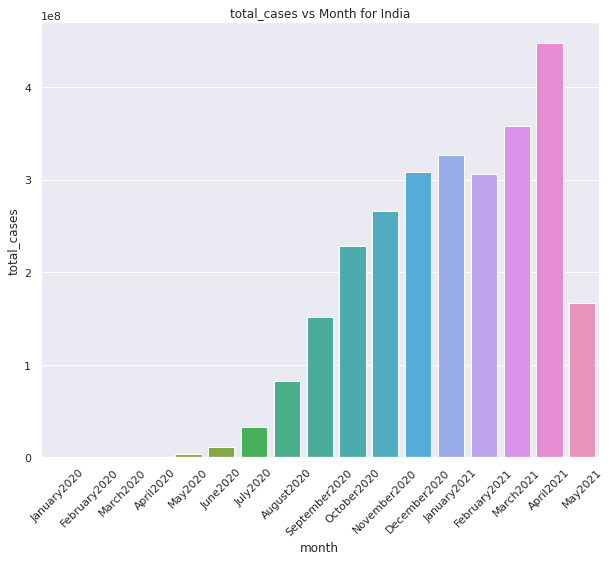

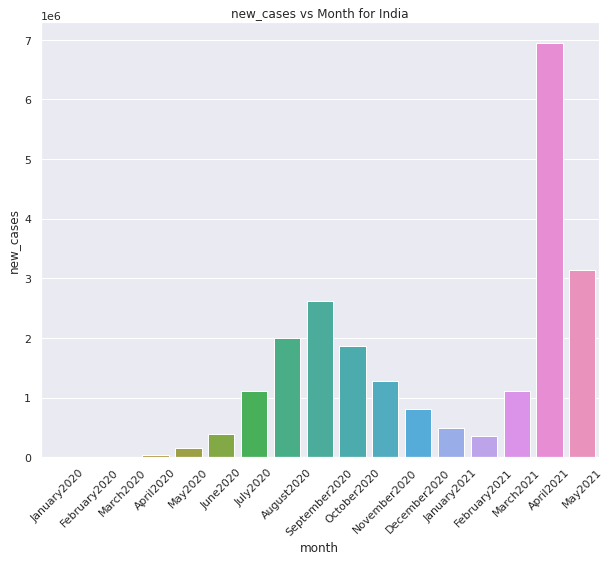

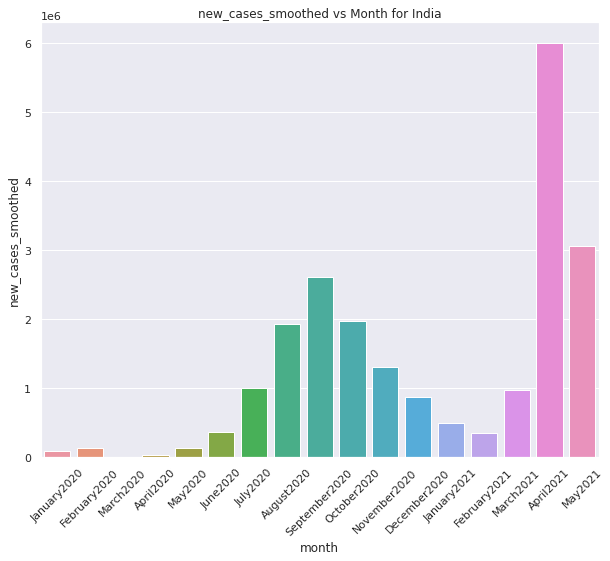

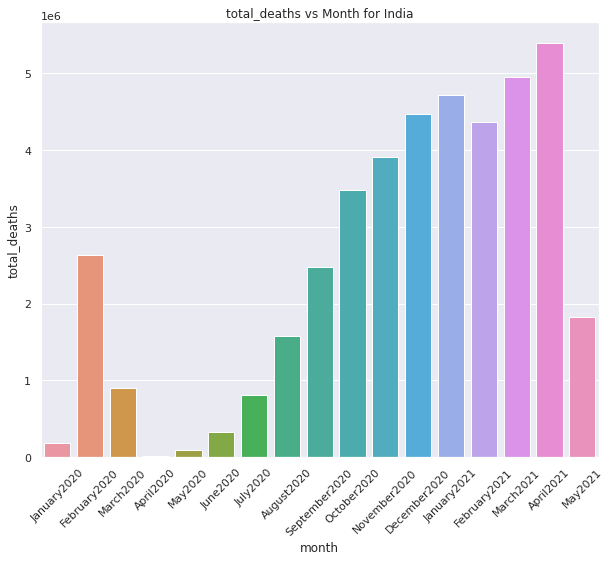

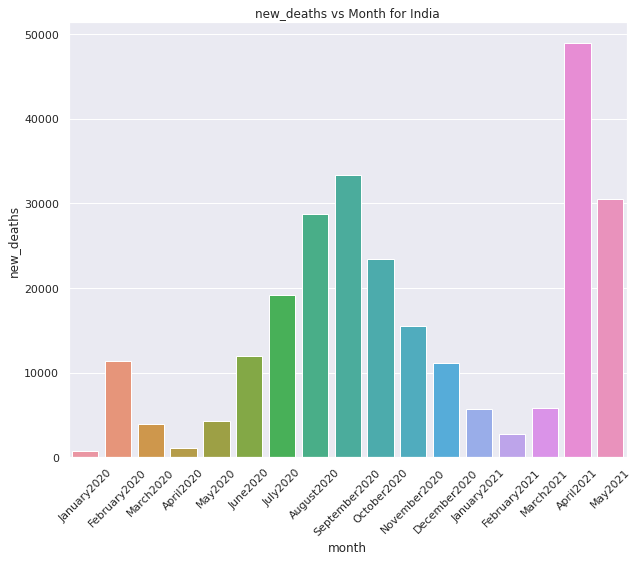

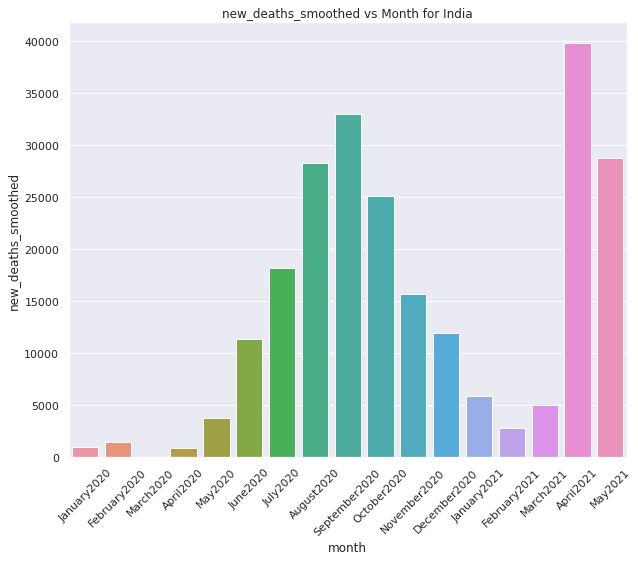

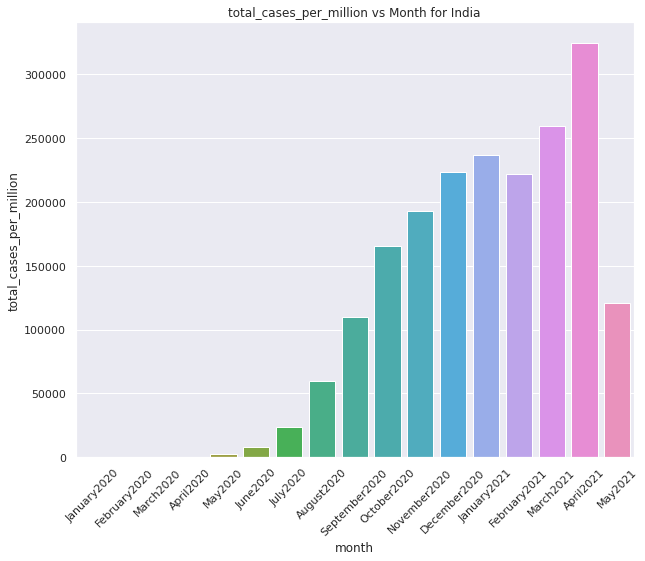

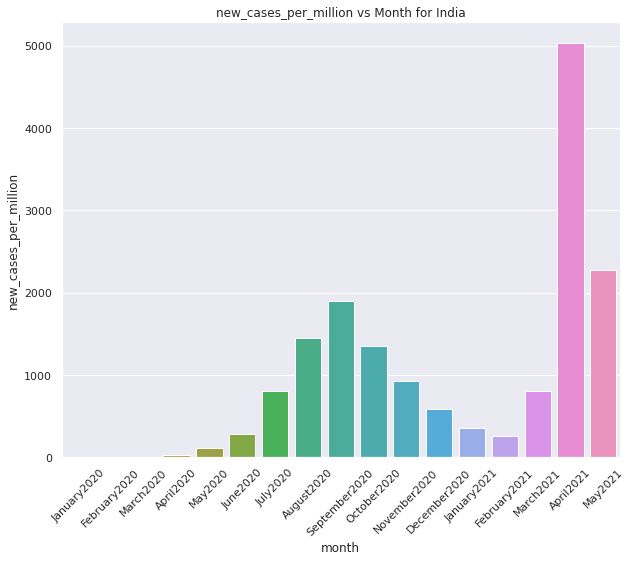

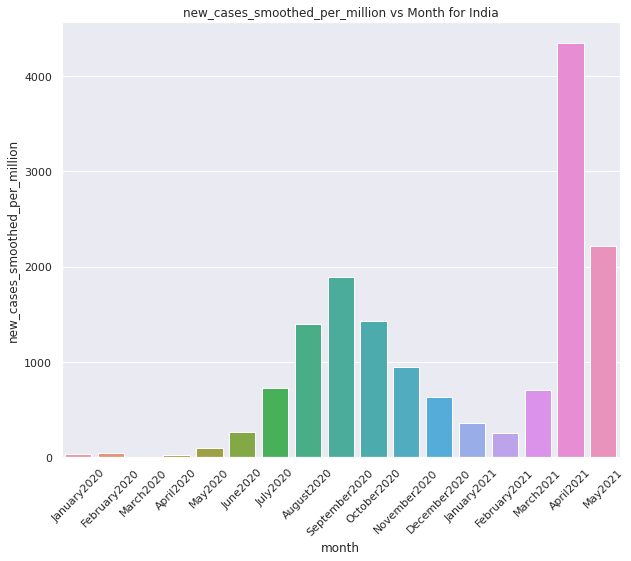

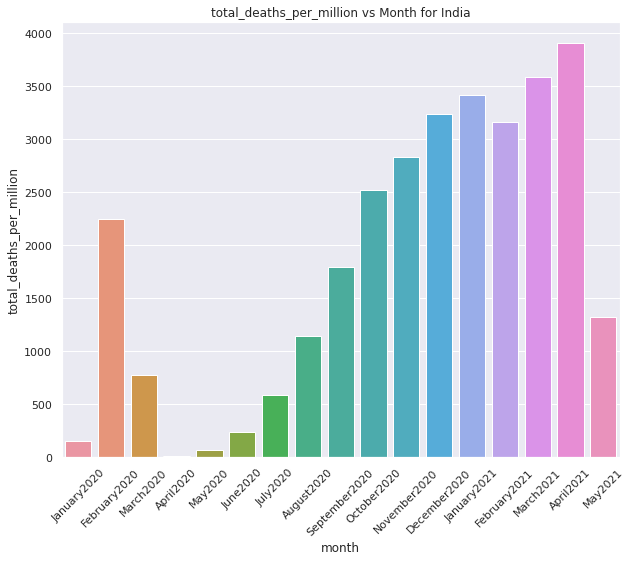

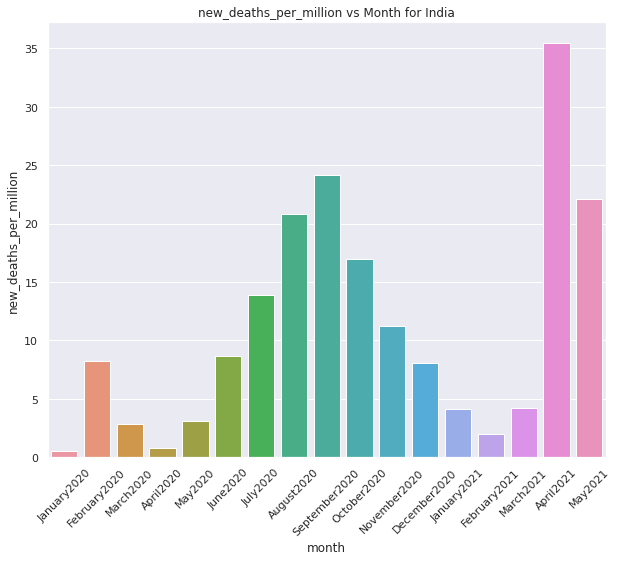

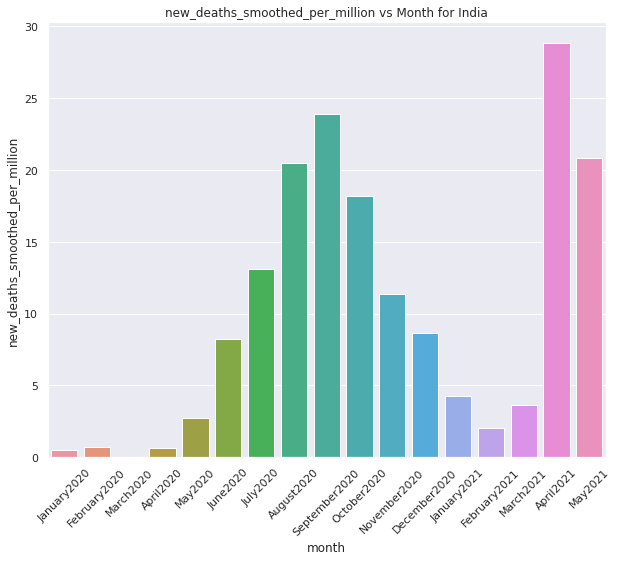

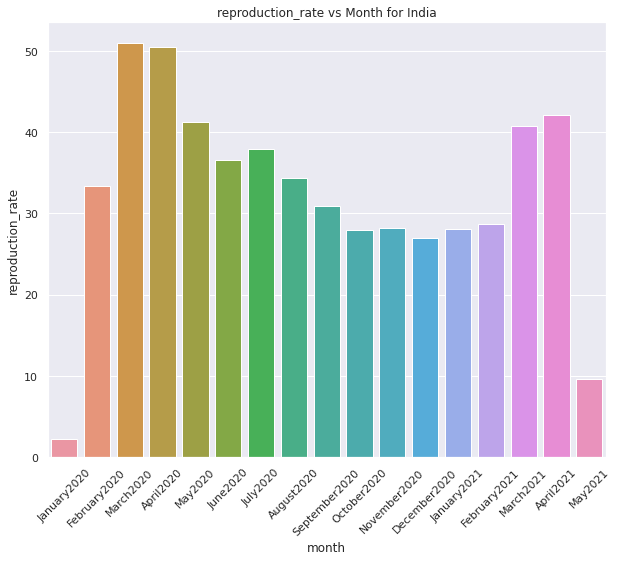

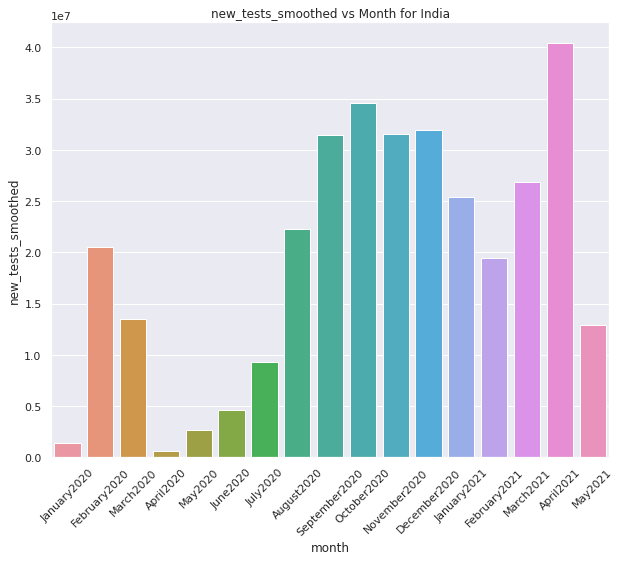

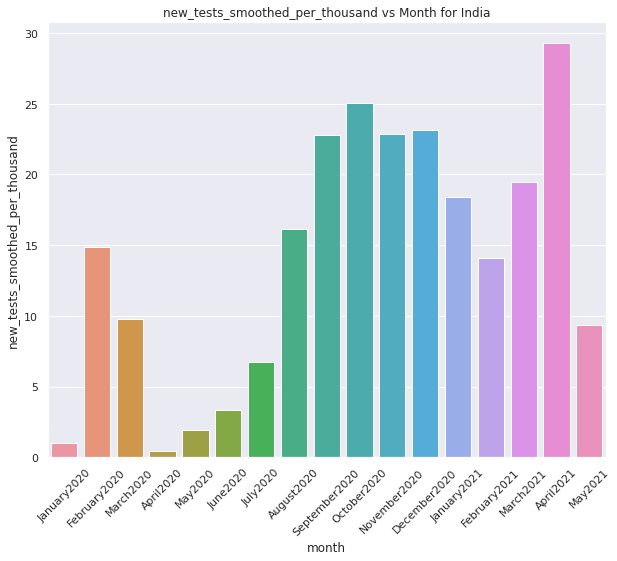

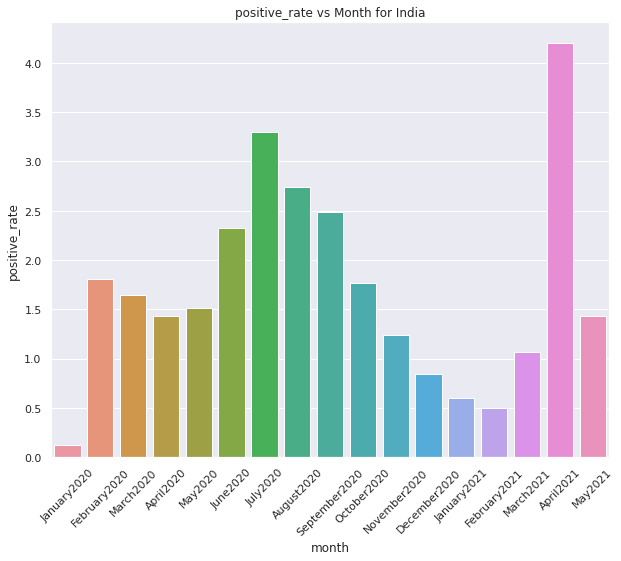

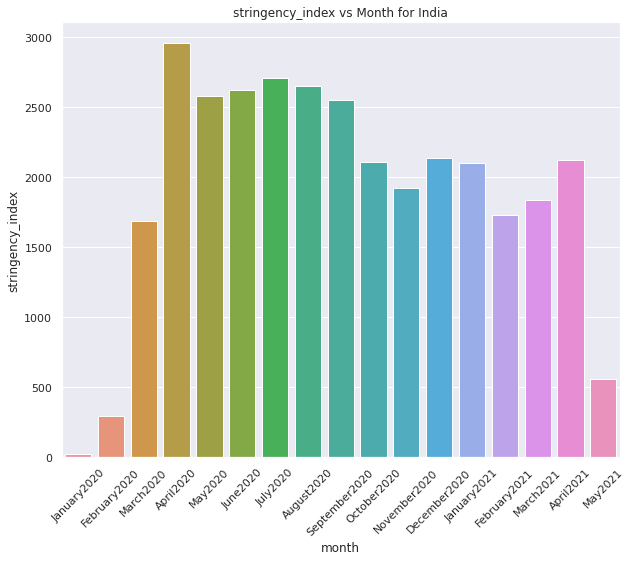

In [29]:
for i, col in enumerate(df_grouped.columns):
    plt.figure(i)
    md=sns.barplot(x=df_grouped.index,y=col,data=df_grouped,ci=None)
    md.set_xticklabels(df_grouped.index, rotation=45)
    md.set_title(col +" vs Month for India")

### Observation:
#### maximum number of new_death was in month of September2020
#### maximum number of new_cases  was in month of September2020
#### Less Stringency Index leads to rise in new_case and new_deaths

### We can see a peak in new_cases in month of September2020 after that graph going down

#### Now plotting with Line Graph to get graph on trend basis.

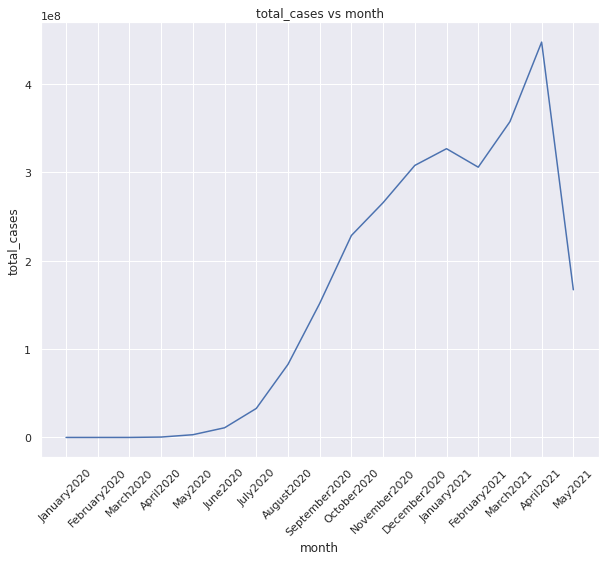

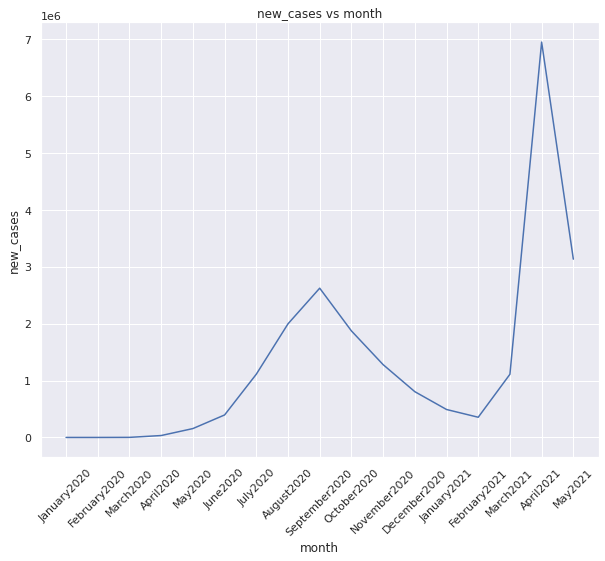

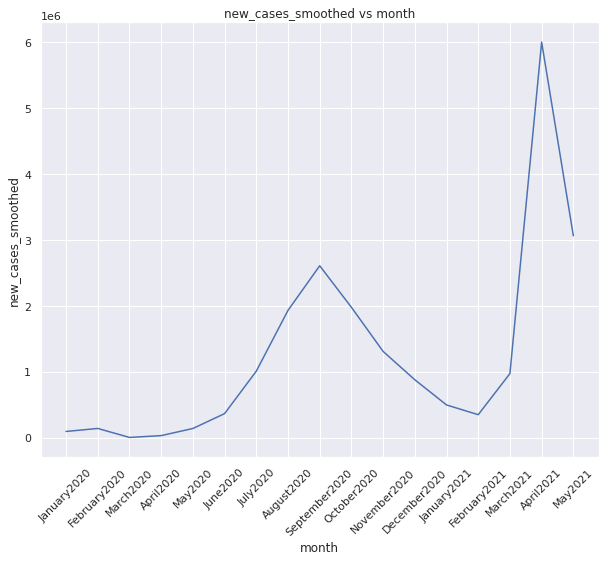

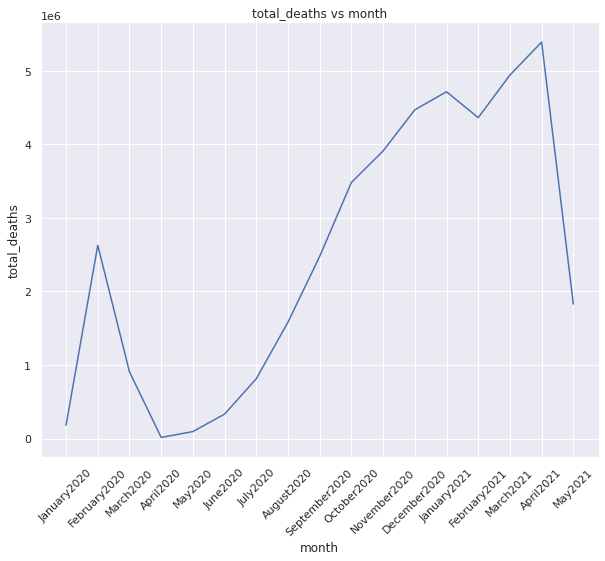

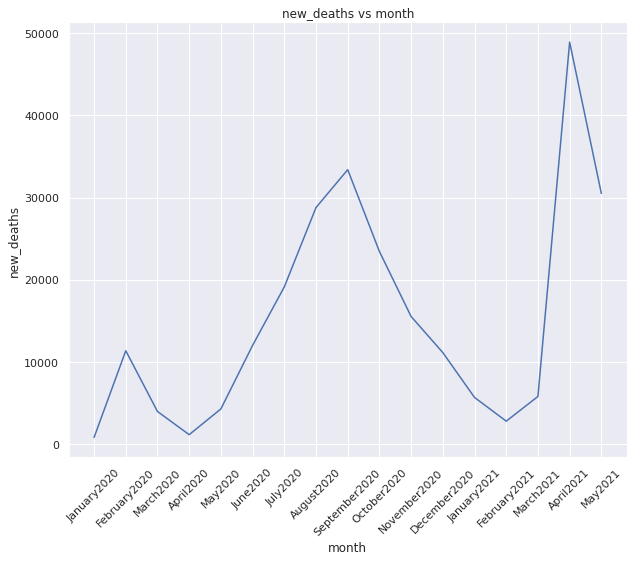

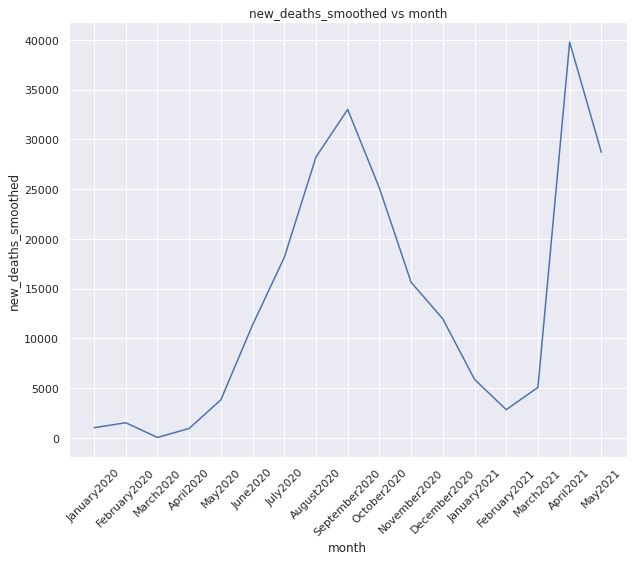

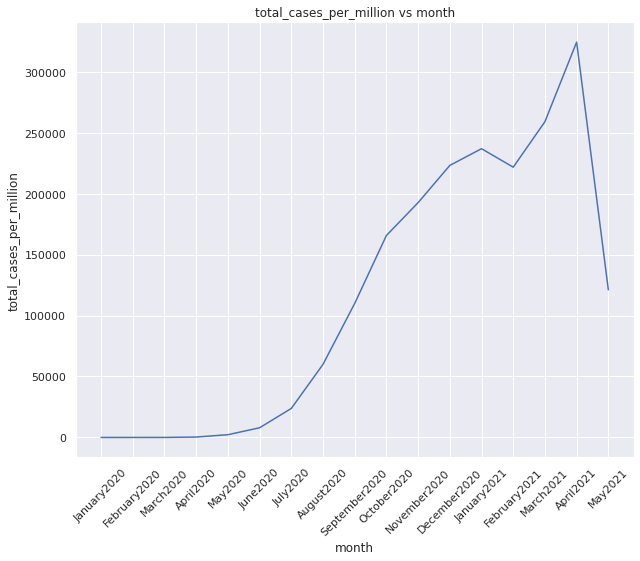

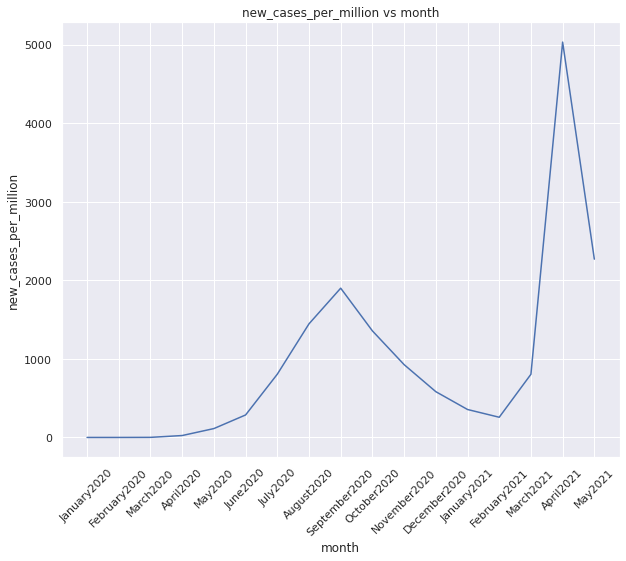

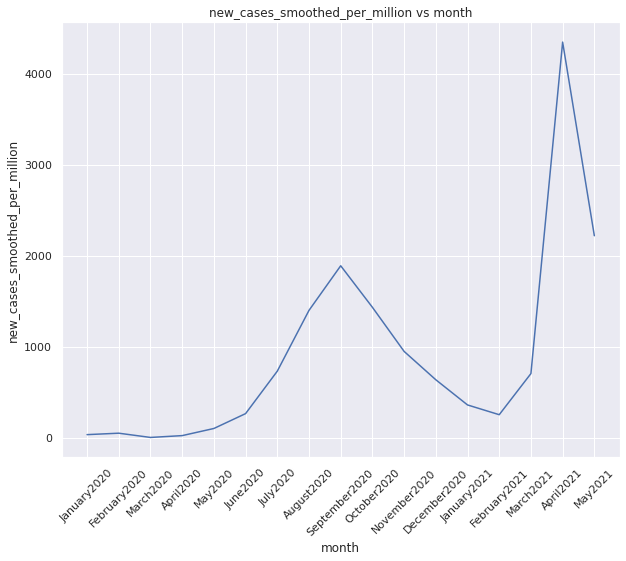

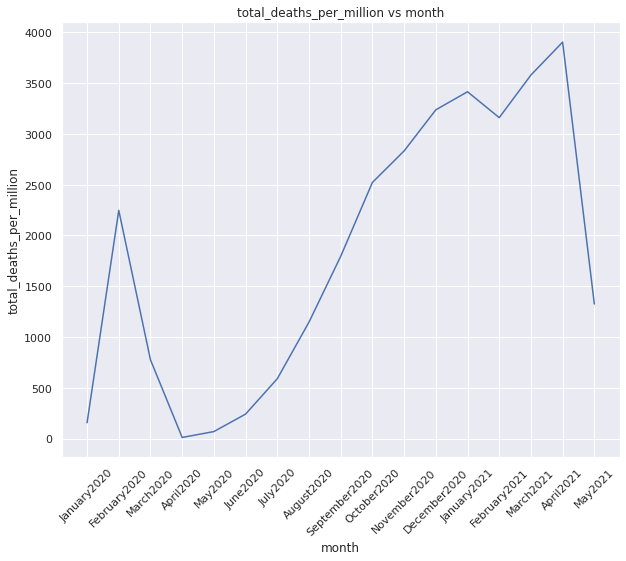

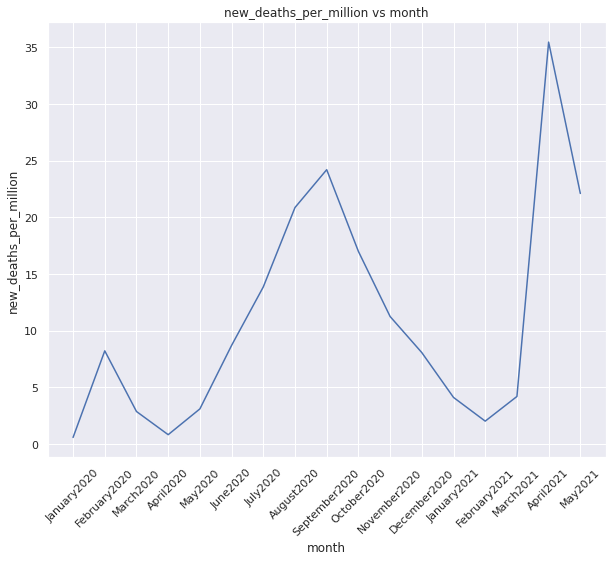

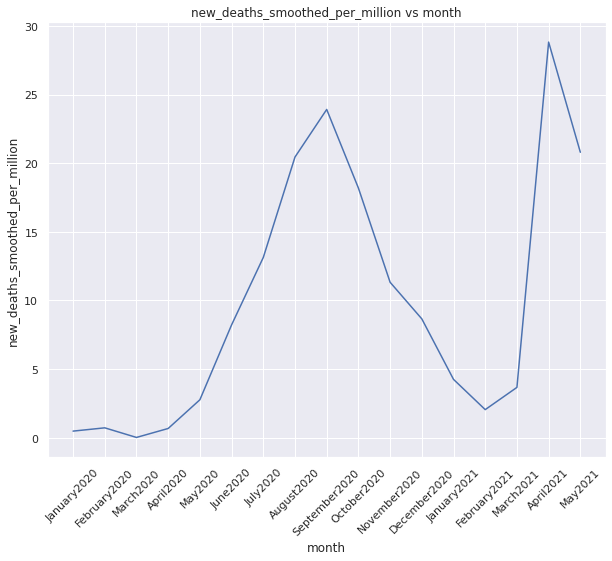

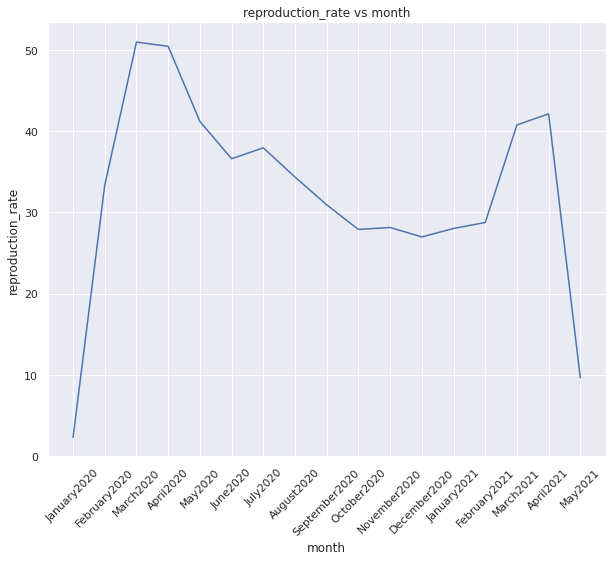

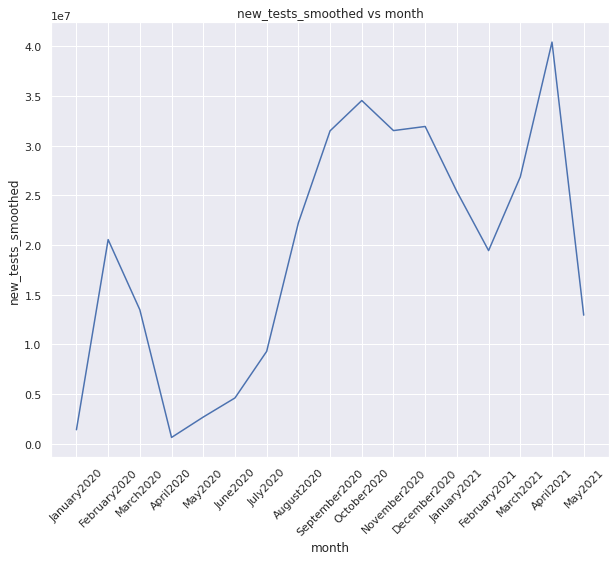

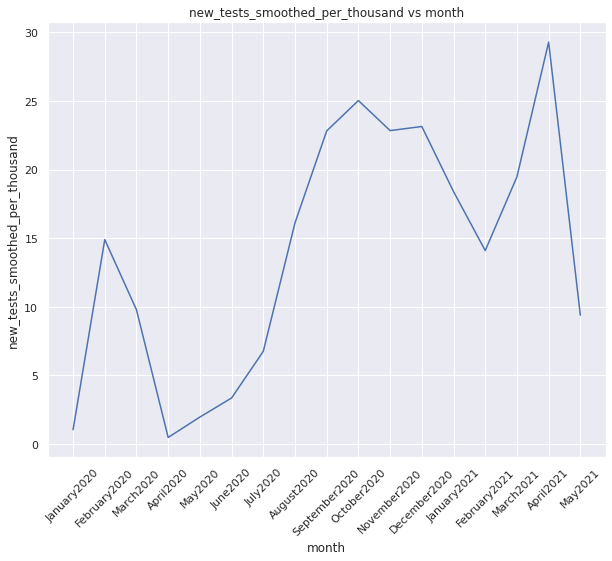

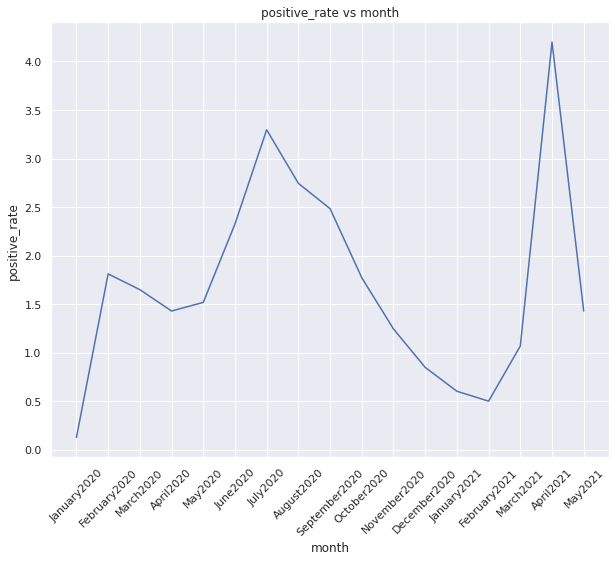

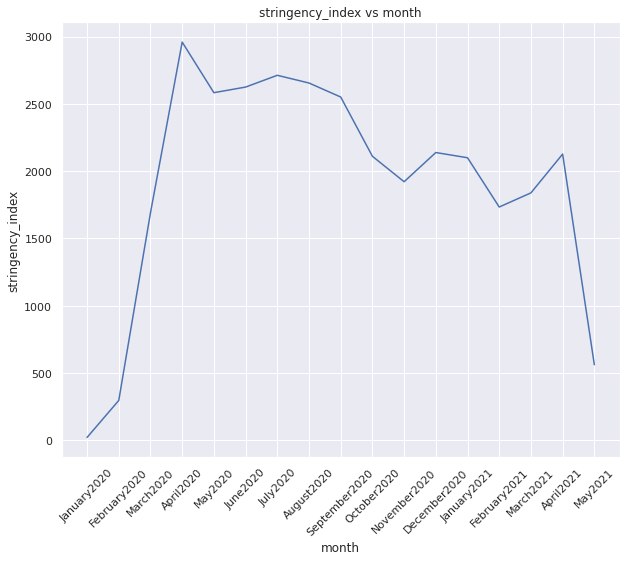

In [30]:
for i, col in enumerate(df_grouped.columns):
    plt.figure(i)
    lg = sns.lineplot(x=df_grouped.index,y=col,data=df_grouped)
    lg.set_xticklabels(df_grouped.index, rotation=45)
    lg.set_title(col +" vs month")

### Observation: We can see a big fall from December2021 in "total_cases"

## As our target variable is new_cases, so checking relation of new_case with time wrt other columns.

Text(0.5, 1.0, 'new_deaths vs date with hue as reproduction_rate')

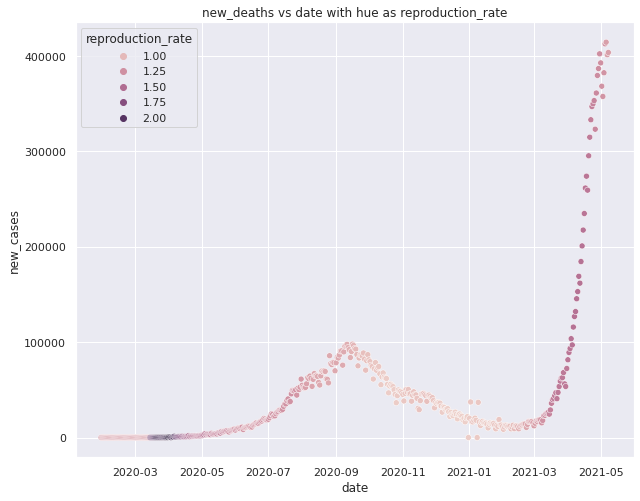

In [31]:
sns.scatterplot(y=df_filtered.new_cases,x=df_filtered.date,hue=df_filtered.reproduction_rate).set_title("new_deaths vs date with hue as reproduction_rate")

### Observation: Starting reproduction_rate was 2.0, but we're doing less testing at that time, so we're unable to see rise in new_cases at that time.

Text(0.5, 1.0, 'new_cases vs date with hue as positive_rate')

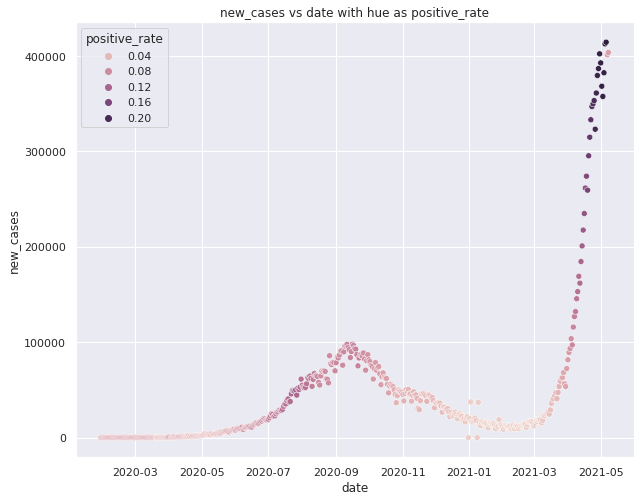

In [32]:
sns.scatterplot(y=df_filtered.new_cases,x=df_filtered.date,hue=df_filtered.positive_rate).set_title("new_cases vs date with hue as positive_rate")

### Observation: positive_rate is higher from july to approx September month. As positive_rate is higher that period of time because IRDA approve covid-19 in medical policy so people comming out and do testing.(my point of view). 

Text(0.5, 1.0, 'new_cases vs date with hue as stringency_index')

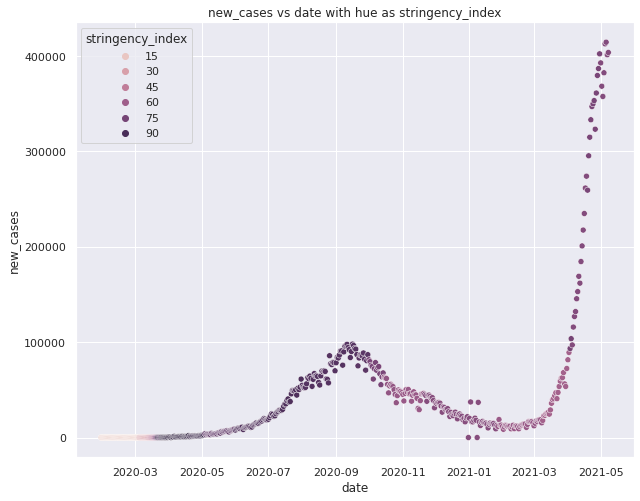

In [33]:
sns.scatterplot(y=df_filtered.new_cases,x=df_filtered.date,hue=df_filtered.stringency_index).set_title("new_cases vs date with hue as stringency_index")

### Observartion: Lockdown can't stop covid-19 in India, btw lockdown was implemented as government get some time to what to do and making number of bed availabilty and ventilators.

### Plotting Line graph between new_deaths, new_cases, total_deaths, total_cases with respect to each day, from this we get to see vaiartion with each others.

Text(0.5, 1.0, 'Variation of total_deaths, new,cases, total_cases and new_deaths with respect each day')

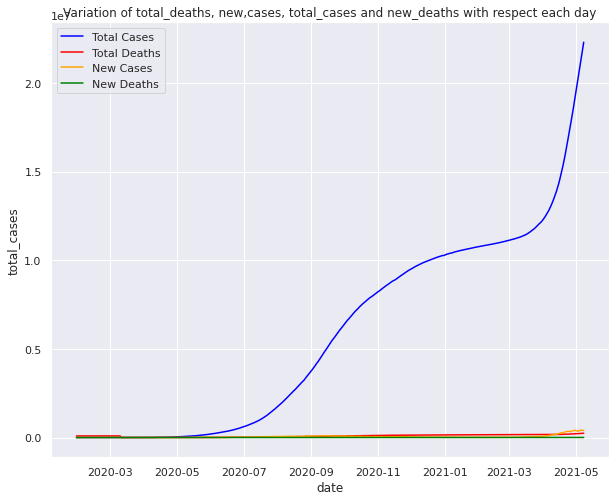

In [34]:
sns.lineplot(x=df_filtered.date,y= df_filtered.total_cases, color="blue", label="Total Cases", linestyle="-")
sns.lineplot(x=df_filtered.date, y= df_filtered.total_deaths ,color="red", label="Total Deaths", linestyle="-")
sns.lineplot(x=df_filtered.date, y= df_filtered.new_cases ,color="orange", label="New Cases", linestyle="-")
sns.lineplot(x=df_filtered.date ,y= df_filtered.new_deaths, color="green", label="New Deaths", linestyle="-").set_title("Variation of total_deaths, new,cases, total_cases and new_deaths with respect each day")

### Getting more clear picture.

Text(0.5, 1.0, 'Variation of Deaths, new_cases and new_deaths with respect each day')

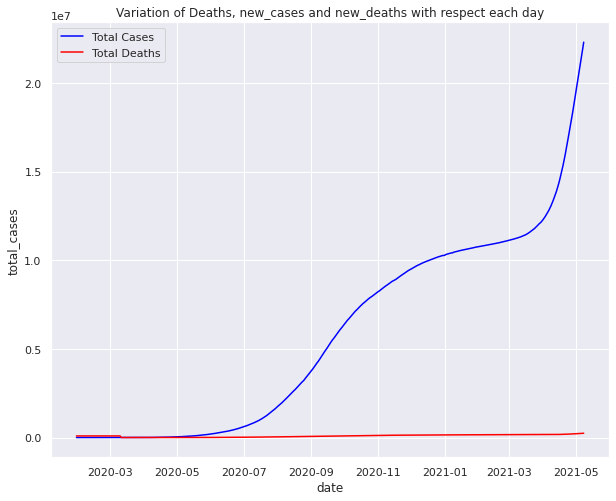

In [35]:
sns.lineplot(x=df_filtered.date,y= df_filtered.total_cases, color="blue", label="Total Cases", linestyle="-")
sns.lineplot(x=df_filtered.date, y= df_filtered.total_deaths ,color="red", label="Total Deaths", linestyle="-").set_title("Variation of Deaths, new_cases and new_deaths with respect each day")

### As we can notice in above graph, increase in total case leads to increase in total deaths too.

## 3) Modeling and Feature Selection

### Taking cube root of data to reduce outliers

In [36]:
df_filtered[['new_cases','new_deaths','new_cases_smoothed','new_deaths','new_deaths_smoothed','new_cases_per_million','new_cases_smoothed_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','stringency_index']] = np.cbrt(df_filtered[['new_cases','new_deaths','new_cases_smoothed','new_deaths','new_deaths_smoothed','new_cases_per_million','new_cases_smoothed_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','stringency_index']])

### positive_rate is higly skewed and has high outliers, so doing log transformtion.

In [37]:
df_filtered['positive_rate'] = np.log(df_filtered['positive_rate'])

## Normalizing the data using minmax scaler

#### What is Min-Max Scaler?
#### A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [39]:
df_filtered.loc[:,'total_cases':"stringency_index"] = scaler.fit_transform(df_filtered.loc[:,'total_cases':"stringency_index"])
df_filtered[['recovered_cases']] = scaler.fit_transform(df_filtered[['recovered_cases']])

### Based on the above graphs the following features have been chosen for traning

# Multiple Regression

## Multiple regression generally explains the relationship between multiple independent or predictor variables and one dependent or criterion variable. A dependent variable is modeled as a function of several independent variables with corresponding coefficients, along with the constant term.  Multiple regression requires two or more predictor variables, and this is why it is called multiple regression.

## The multiple regression equation explained above takes the following form:

## y = b1x1 + b2x2 + … + bnxn + c.

# 
# 
# 

# (i) Randomly Splitting

###  First we're doing randomly splitting data into train and test on ratio of 7:3, it is good practice to divide data into 7:3, 7.5:2.5, 8:2 To get good result
### Training - We're giving data for training the model so that it can predict data
### Testing - We're testing data on basis of result given on training output

In [40]:
from sklearn.model_selection import train_test_split
X = df_filtered[['total_cases','total_deaths', 'new_deaths', 'positive_rate','stringency_index','recovered_cases','new_tests_smoothed']]
Y= df_filtered['new_cases']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print('Training set size:', X_train.shape, Y_train.shape)
print('Test set size:', X_test.shape, Y_test.shape)

Training set size: (325, 7) (325,)
Test set size: (140, 7) (140,)


### Now Fitting and predicting our data to get result

In [41]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

# Fitting the model on the train dataset
regr.fit (X_train, Y_train)

# Predicting for the X_test points
pxpoint =regr.predict(X_test)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

print("Train Data Score",regr.score(X_train,Y_train))
print("Test Data Score",regr.score(X_test,Y_test))

Y_test = np.asanyarray(Y_test)

from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(pxpoint - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pxpoint - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(pxpoint,Y_test) )

Coefficients:  [-13.15806201  -0.26812238   0.6464216    0.24052517   0.25871818
  13.69477639   0.18193808]
Intercept:  -0.40628646549705383
Train Data Score 0.9694809863475985
Test Data Score 0.9787524502504346
Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.98


### Information

#### Coefficients - Multipicative Factor
#### Intercept - A point where the line crosses
#### Score - Best possible is 1.0
#### MAE - Mean Absolute Error (MAE) measure of errors between paired observations expressing the same phenomenon.
#### MSE - Mean Square Error(MSE) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
#### R^2 (coefficient of determination) regression score function - Best possible score is 1.0 

## Now Evaluating our result from K Fold Cross Validation

### What is K Fold?
### Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cv = KFold(n_splits=10, random_state=1, shuffle=True)
pxpoint2 = cross_val_predict( regr,X_test,Y_test, cv= cv)
print(pxpoint)
Rc=cross_val_score( regr,X_test,Y_test, cv=10)
print('Accuracy: %.3f (%.3f)' % (np.mean(Rc), np.std(Rc)))

[0.52087231 0.57441852 0.44788368 0.58634286 0.18767981 0.5721619
 0.18807768 0.57468501 0.42585343 0.2936571  0.46225765 0.00504035
 0.48998135 0.27035115 0.43993164 0.45825778 0.12893432 0.50024408
 0.50371401 0.35962444 0.43436877 0.54714738 0.00503972 0.46277203
 0.19434591 0.49243199 0.43751949 0.38839398 0.46629722 0.42653297
 0.35921224 0.59918165 0.3188756  0.28235809 0.49526698 0.32929614
 0.4847644  0.48099886 0.00504035 0.2537843  0.07767377 0.48342147
 0.27772609 0.00504035 0.68440957 0.40939029 0.50939306 0.13494269
 0.17072706 0.48836636 0.44722535 0.50080431 0.45191647 0.49855552
 0.43298594 0.32878177 0.18385915 0.39046852 0.00504035 0.51700939
 0.47483907 0.47952748 0.59534235 0.67082619 0.28277151 1.09749351
 0.39104343 0.25813505 0.46522204 0.17534686 0.33438113 0.20233201
 0.43302889 0.38478624 0.55452897 0.33633613 0.49760989 0.47874902
 0.26980102 0.00504035 0.94375449 0.40478785 0.59283158 0.59796376
 0.34728468 0.4644173  0.33384391 0.78686023 0.09765556 0.35955

### Accuracy is nearby 1, we can say that this randomly multiple regression model is working fine.

# (ii) Monthly Splitting

## Case-1 When new_case was on peak
## Case-2 When new_cases start increasing exponentially
## Case-3 When new_cases start decreasing
## Case-4 When there is no new_cases(approx)







#   

## Case-1 When new_case was on peak

### Now Grouping data in 2 Sets, basically on month basis.

In [43]:
df_grouping1= df_filtered[ (df_filtered['month'] != 'September2020' ) & ( df_filtered['month'] != 'October2020' ) & ( df_filtered['month'] != 'November2020' )]
print(df_grouping1.shape)
df_grouping2=df_filtered[ (df_filtered['month'] == 'September2020' ) | ( df_filtered['month'] == 'October2020' ) | ( df_filtered['month'] == 'November2020' )]
print(df_grouping2.shape)

(374, 39)
(91, 39)


In [44]:
from sklearn.model_selection import train_test_split
X1 = df_grouping1[['total_cases','total_deaths', 'new_deaths', 'positive_rate','stringency_index','recovered_cases','new_tests_smoothed']]
Y1= df_grouping1['new_cases']

from sklearn import linear_model
regr1 = linear_model.LinearRegression()
regr1.fit (X1, Y1)
print("Test Data Score:",regr1.score(X1,Y1))

x = np.array(df_grouping2[['total_cases','total_deaths', 'new_deaths', 'positive_rate','stringency_index','recovered_cases','new_tests_smoothed']])
pxpoint2 =regr1.predict(x)
y_test2 = np.asanyarray(df_grouping2['new_cases'])
print("Regression Score of 3 months:",regr1.score(x,y_test2))

from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(pxpoint2 - y_test2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pxpoint2 - y_test2) ** 2))
print("R2-score: %.2f" % r2_score(pxpoint2 ,y_test2))

Test Data Score: 0.9720315934712376
Regression Score of 3 months: 0.6968165499279736
Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.45


Text(0, 0.5, 'new_cases')

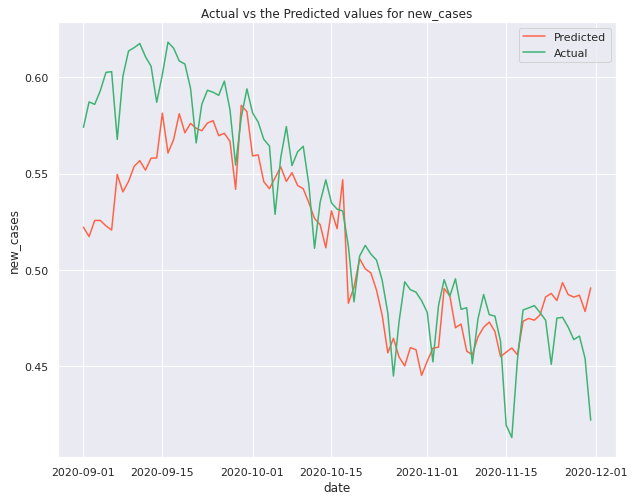

In [45]:
ax=sns.lineplot(x= df_grouping2.date, y=pxpoint2, color="tomato", label="Predicted")
ax=sns.lineplot(x= df_grouping2.date, y=y_test2, color="MediumSeaGreen", label="Actual")
ax.set_title("Actual vs the Predicted values for new_cases")
ax.set_xlabel('date')
ax.set_ylabel('new_cases')

## Case-2 When new_cases start increasing exponentially

In [46]:
df_grouping1= df_filtered[ (df_filtered['month'] != 'April2020' ) & ( df_filtered['month'] != 'May2020' ) & ( df_filtered['month'] != 'June2020' )]
print(df_grouping1.shape)
df_grouping2=df_filtered[ (df_filtered['month'] == 'April2020' ) | ( df_filtered['month'] == 'May2020' ) | ( df_filtered['month'] == 'June2020' )]
print(df_grouping2.shape)

(374, 39)
(91, 39)


In [47]:
from sklearn.model_selection import train_test_split
X1 = df_grouping1[['total_cases','total_deaths', 'new_deaths', 'positive_rate','stringency_index','recovered_cases','new_tests_smoothed']]
Y1= df_grouping1['new_cases']

from sklearn import linear_model
regr1 = linear_model.LinearRegression()
regr1.fit (X1, Y1)
print("Test Data Score:",regr1.score(X1,Y1))

x = np.array(df_grouping2[['total_cases','total_deaths', 'new_deaths', 'positive_rate','stringency_index','recovered_cases','new_tests_smoothed']])
pxpoint2 =regr1.predict(x)
y_test2 = np.asanyarray(df_grouping2['new_cases'])
print("Regression Score of 3 months:",regr1.score(x,y_test2))

from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(pxpoint2 - y_test2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pxpoint2 - y_test2) ** 2))
print("R2-score: %.2f" % r2_score(pxpoint2 ,y_test2))

Test Data Score: 0.9777206804947882
Regression Score of 3 months: 0.33403373901116773
Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.50


Text(0, 0.5, 'new_cases')

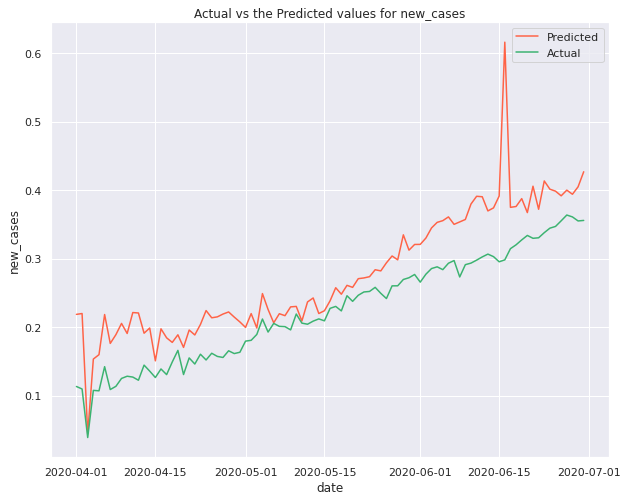

In [48]:
ax=sns.lineplot(x= df_grouping2.date, y=pxpoint2, color="tomato", label="Predicted")
ax=sns.lineplot(x= df_grouping2.date, y=y_test2, color="MediumSeaGreen", label="Actual")
ax.set_title("Actual vs the Predicted values for new_cases")
ax.set_xlabel('date')
ax.set_ylabel('new_cases')

## Case-3 When new_cases start decreasing

In [49]:
df_grouping1= df_filtered[ (df_filtered['month'] != 'October2020' ) & ( df_filtered['month'] != 'November2020' ) & ( df_filtered['month'] != 'December2020' )]
print(df_grouping1.shape)
df_grouping2=df_filtered[ (df_filtered['month'] == 'October2020' ) | ( df_filtered['month'] == 'November2020' ) | ( df_filtered['month'] == 'December2020' )]
print(df_grouping2.shape)

(373, 39)
(92, 39)


In [50]:
from sklearn.model_selection import train_test_split
X1 = df_grouping1[['total_cases','total_deaths', 'new_deaths', 'positive_rate','stringency_index','recovered_cases','new_tests_smoothed']]
Y1= df_grouping1['new_cases']

from sklearn import linear_model
regr1 = linear_model.LinearRegression()
regr1.fit (X1, Y1)
print("Test Data Score:",regr1.score(X1,Y1))

x = np.array(df_grouping2[['total_cases','total_deaths', 'new_deaths', 'positive_rate','stringency_index','recovered_cases','new_tests_smoothed']])
pxpoint2 =regr1.predict(x)
y_test2 = np.asanyarray(df_grouping2['new_cases'])
print("Regression Score of 3 months:",regr1.score(x,y_test2))

from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(pxpoint2 - y_test2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pxpoint2 - y_test2) ** 2))
print("R2-score: %.2f" % r2_score(pxpoint2 ,y_test2))

Test Data Score: 0.977676092545289
Regression Score of 3 months: 0.544072409307174
Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.13


Text(0, 0.5, 'new_cases')

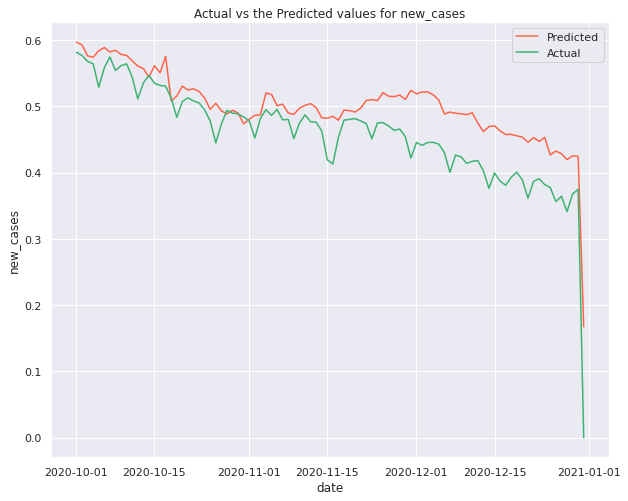

In [51]:
ax=sns.lineplot(x= df_grouping2.date, y=pxpoint2, color="tomato", label="Predicted")
ax=sns.lineplot(x= df_grouping2.date, y=y_test2, color="MediumSeaGreen", label="Actual")
ax.set_title("Actual vs the Predicted values for new_cases")
ax.set_xlabel('date')
ax.set_ylabel('new_cases')

## Case-4 When there is no new_cases(approx)

In [52]:
df_grouping1= df_filtered[ (df_filtered['month'] != 'January2020' ) & ( df_filtered['month'] != 'Febuary2020' ) & ( df_filtered['month'] != 'March2020' )]
print(df_grouping1.shape)
df_grouping2=df_filtered[ (df_filtered['month'] == 'January2020' ) | ( df_filtered['month'] == 'Febuary2020' ) | ( df_filtered['month'] == 'March2020' )]
print(df_grouping2.shape)

(432, 39)
(33, 39)


In [53]:
from sklearn.model_selection import train_test_split
X1 = df_grouping1[['total_cases','total_deaths', 'new_deaths', 'positive_rate','stringency_index','recovered_cases','new_tests_smoothed']]
Y1= df_grouping1['new_cases']

from sklearn import linear_model
regr1 = linear_model.LinearRegression()
regr1.fit (X1, Y1)
print("Test Data Score:",regr1.score(X1,Y1))

x = np.array(df_grouping2[['total_cases','total_deaths', 'new_deaths', 'positive_rate','stringency_index','recovered_cases','new_tests_smoothed']])
pxpoint2 =regr1.predict(x)
y_test2 = np.asanyarray(df_grouping2['new_cases'])
print("Regression Score of 3 months:",regr1.score(x,y_test2))

from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(pxpoint2 - y_test2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pxpoint2 - y_test2) ** 2))
print("R2-score: %.2f" % r2_score(pxpoint2 ,y_test2))

Test Data Score: 0.9725101836055025
Regression Score of 3 months: -14.000319945547075
Mean absolute error: 0.07
Residual sum of squares (MSE): 0.01
R2-score: -0.03


Text(0, 0.5, 'new_cases')

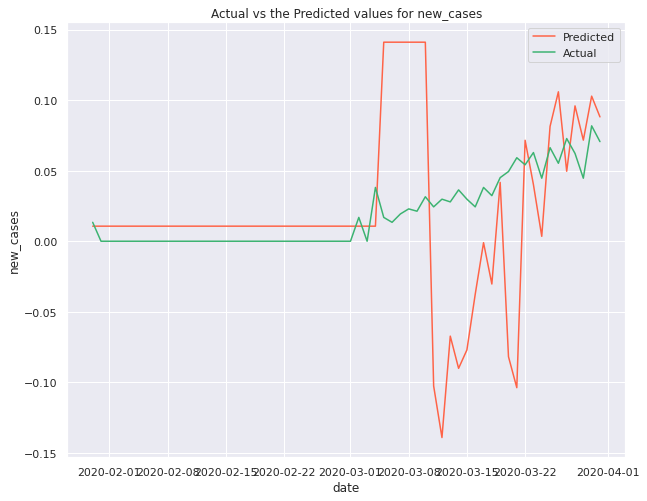

In [54]:
ax=sns.lineplot(x= df_grouping2.date, y=pxpoint2, color="tomato", label="Predicted")
ax=sns.lineplot(x= df_grouping2.date, y=y_test2, color="MediumSeaGreen", label="Actual")
ax.set_title("Actual vs the Predicted values for new_cases")
ax.set_xlabel('date')
ax.set_ylabel('new_cases')

## So we can see how data variates from each other in each scenrio , examaple First wave rising, peak, then grapgh going down and predicting wehn we have almost no cases in India and see how data prediction fluctuates.

## Conclusion - As data fluctuates a lot in case of India, we're not getting good score in 2 cases out of 4. So we must not dependent on Multiple regression specially for India.

# Now we have a data till 04/04/2021, right now in India we're experencing 2nd wave, so waiting for that data it will improve our model. 

# 
# 
#
#
#

# The SIR Epidemic Model

### A simple mathematical description of the spread of a disease in a population is the so-called SIR model,which divides the (fixed) population of N individuals into three "compartments" which may vary as a function of time, t:

### S(t) are those susceptible but not yet infected with the disease.
### I(t) is the number of infectious individuals
### R(t) are those individuals who have recovered from the disease and now have immunity to it.

### Model - Susceptible > Infected > Removed

### The model is started with a single infected individual on day 0: I(0)=1( from data set)
### S, I and R represent the number of susceptible,infected,and recovered individuals, and N = S + I + R is the total population.

In [55]:
# Total population, N.
N=df_filtered["population"].mean()

#beta-the transmission rate constant.(reproduction_rate from data set)
#expected amount of people  an infected person infect perday
beta=df_filtered['reproduction_rate'].mean()

D=14        #D= no of days an infected person has and can spread the disease(like 14-21days)

#gamma-removal rate(the proportion of infected removed per day)
gamma=1/D

In [56]:
from scipy.integrate import odeint

In [57]:
# The SIR model differential equations.
def deriv(x, t,beta, gamma):
    s,i,r =x
    dsdt= -(beta * s * i)/N
    didt=(beta *s *i)/N - gamma * i
    drdt=gamma * i
    return [dsdt,didt,drdt]

In [58]:
#initial condition
i0 = 1                                   #new_cases on first day of our dataset 
r0 = 0
s0=N -i0 - r0                            # Everyone else,S0,is susceptible to infection initially.

In [59]:
# A grid of time points (in days)
t=np.linspace(0,200,200)
x0=s0,i0,r0

In [60]:
# Integrate the SIR equations over the time grid, t.
soln = odeint(deriv, x0, t, args=(beta,gamma))
s,i,r=soln.T

Text(0, 0.5, 'Fraction')

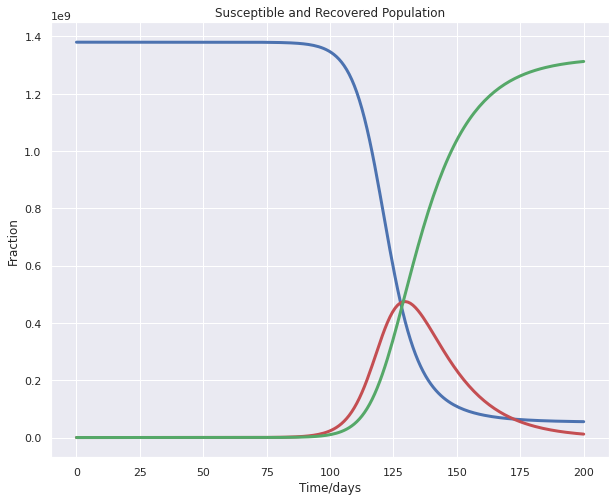

In [61]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.plot(t, s, 'b' ,lw=3, label='Fraction susceptible')
ax.plot(t, i, 'r' ,lw=3, label='Fraction infected')
ax.plot(t, r, 'g' ,lw=3, label='Recovered with immunity')
ax.set_title('Susceptible and Recovered Population')
ax.set_xlabel('Time/days')
ax.set_ylabel('Fraction')